In [2]:
from cv2 import __version__
__version__


'4.7.0'

In [3]:
from platform import python_version
python_version()

'3.11.0'

# RECOGNITION OF SLOW DOWN AND STOP HAND SIGNALS

# PID 2
## Group Members
## Ronak Landge        Roll no: 8
## Yash Lunkad           Roll no: 10
## Omkar Maindre       Roll no: 15 

### Importing Dependencies 

In [1]:
import numpy as np
import pandas as pd
import os
import csv
import cv2
import pickle
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from cv2 import *
import warnings
warnings.filterwarnings('ignore')

### DEFINING DATASET PATH 

In [2]:
folder_n=r"D:\Braintumour\dataset\Training\no_tumor"
folder_glioma=r"D:\Braintumour\dataset\Training\glioma_tumor"
folder_meningioma=r"D:\Braintumour\dataset\Training\meningioma_tumor"
folder_pituitary=r"D:\Braintumour\dataset\Training\pituitary_tumor"

## BRISK 

In [3]:
csv1_b=r"D:\Braintumour\dataset\Training\no_tumor.csv"
csv2_b=r"D:\Braintumour\dataset\Training\glioma_tumor.csv"
csv3_b=r"D:\Braintumour\dataset\Training\meningioma_tumor.csv"
csv4_b=r"D:\Braintumour\dataset\Training\pituitary_tumor.csv"

In [4]:
def feature_brisk(folder_name, csv_dest):
    i=0
    for filename in os.listdir(folder_name):
        #path
        path=os.path.join(folder_name,filename)
        a=cv2.imread(path)

        #resize image
        resize=(150,150)
        img=cv2.resize(a,resize)

        #gray image
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        #brisk code for feature descriptor
        brisk = cv2.BRISK_create()
        keypoint,descriptor = brisk.detectAndCompute(gray,None)
        
        out=pd.DataFrame(descriptor)
        #convert the descriptor array into a dataframe format
        print("descriptor shape ",i," : ", out.shape)
        i=i+1
        if i==2000:
            break

        #drop first coloumn as it's the no of feature detected. Not required.
        #append to the csv file
        csv_data=out.to_csv(csv_dest, mode='a', header=False,index=False)

In [5]:
feature_brisk(folder_n,csv1_b)

descriptor shape  0  :  (373, 64)
descriptor shape  1  :  (305, 64)
descriptor shape  2  :  (67, 64)
descriptor shape  3  :  (353, 64)
descriptor shape  4  :  (169, 64)
descriptor shape  5  :  (338, 64)
descriptor shape  6  :  (167, 64)
descriptor shape  7  :  (311, 64)
descriptor shape  8  :  (306, 64)
descriptor shape  9  :  (145, 64)
descriptor shape  10  :  (85, 64)
descriptor shape  11  :  (193, 64)
descriptor shape  12  :  (193, 64)
descriptor shape  13  :  (150, 64)
descriptor shape  14  :  (150, 64)
descriptor shape  15  :  (410, 64)
descriptor shape  16  :  (185, 64)
descriptor shape  17  :  (264, 64)
descriptor shape  18  :  (132, 64)
descriptor shape  19  :  (150, 64)
descriptor shape  20  :  (45, 64)
descriptor shape  21  :  (331, 64)
descriptor shape  22  :  (187, 64)
descriptor shape  23  :  (125, 64)
descriptor shape  24  :  (193, 64)
descriptor shape  25  :  (93, 64)
descriptor shape  26  :  (62, 64)
descriptor shape  27  :  (112, 64)
descriptor shape  28  :  (128, 64)


In [6]:
feature_brisk(folder_glioma,csv2_b)

descriptor shape  0  :  (96, 64)
descriptor shape  1  :  (154, 64)
descriptor shape  2  :  (182, 64)
descriptor shape  3  :  (217, 64)
descriptor shape  4  :  (176, 64)
descriptor shape  5  :  (101, 64)
descriptor shape  6  :  (151, 64)
descriptor shape  7  :  (205, 64)
descriptor shape  8  :  (180, 64)
descriptor shape  9  :  (133, 64)
descriptor shape  10  :  (175, 64)
descriptor shape  11  :  (165, 64)
descriptor shape  12  :  (188, 64)
descriptor shape  13  :  (189, 64)
descriptor shape  14  :  (175, 64)
descriptor shape  15  :  (140, 64)
descriptor shape  16  :  (177, 64)
descriptor shape  17  :  (100, 64)
descriptor shape  18  :  (173, 64)
descriptor shape  19  :  (169, 64)
descriptor shape  20  :  (184, 64)
descriptor shape  21  :  (112, 64)
descriptor shape  22  :  (116, 64)
descriptor shape  23  :  (174, 64)
descriptor shape  24  :  (184, 64)
descriptor shape  25  :  (210, 64)
descriptor shape  26  :  (155, 64)
descriptor shape  27  :  (214, 64)
descriptor shape  28  :  (218, 

In [7]:
feature_brisk(folder_meningioma,csv3_b)

descriptor shape  0  :  (194, 64)
descriptor shape  1  :  (173, 64)
descriptor shape  2  :  (165, 64)
descriptor shape  3  :  (307, 64)
descriptor shape  4  :  (238, 64)
descriptor shape  5  :  (236, 64)
descriptor shape  6  :  (132, 64)
descriptor shape  7  :  (99, 64)
descriptor shape  8  :  (111, 64)
descriptor shape  9  :  (100, 64)
descriptor shape  10  :  (100, 64)
descriptor shape  11  :  (199, 64)
descriptor shape  12  :  (106, 64)
descriptor shape  13  :  (65, 64)
descriptor shape  14  :  (65, 64)
descriptor shape  15  :  (85, 64)
descriptor shape  16  :  (239, 64)
descriptor shape  17  :  (176, 64)
descriptor shape  18  :  (75, 64)
descriptor shape  19  :  (91, 64)
descriptor shape  20  :  (72, 64)
descriptor shape  21  :  (74, 64)
descriptor shape  22  :  (225, 64)
descriptor shape  23  :  (70, 64)
descriptor shape  24  :  (75, 64)
descriptor shape  25  :  (91, 64)
descriptor shape  26  :  (334, 64)
descriptor shape  27  :  (210, 64)
descriptor shape  28  :  (228, 64)
descri

In [8]:
feature_brisk(folder_pituitary,csv4_b)

descriptor shape  0  :  (266, 64)
descriptor shape  1  :  (184, 64)
descriptor shape  2  :  (250, 64)
descriptor shape  3  :  (223, 64)
descriptor shape  4  :  (187, 64)
descriptor shape  5  :  (286, 64)
descriptor shape  6  :  (265, 64)
descriptor shape  7  :  (228, 64)
descriptor shape  8  :  (279, 64)
descriptor shape  9  :  (172, 64)
descriptor shape  10  :  (194, 64)
descriptor shape  11  :  (215, 64)
descriptor shape  12  :  (129, 64)
descriptor shape  13  :  (210, 64)
descriptor shape  14  :  (213, 64)
descriptor shape  15  :  (195, 64)
descriptor shape  16  :  (171, 64)
descriptor shape  17  :  (196, 64)
descriptor shape  18  :  (157, 64)
descriptor shape  19  :  (182, 64)
descriptor shape  20  :  (196, 64)
descriptor shape  21  :  (186, 64)
descriptor shape  22  :  (194, 64)
descriptor shape  23  :  (107, 64)
descriptor shape  24  :  (181, 64)
descriptor shape  25  :  (137, 64)
descriptor shape  26  :  (149, 64)
descriptor shape  27  :  (143, 64)
descriptor shape  28  :  (252,

In [9]:
data1_b = pd.read_csv(csv1_b,header=None,dtype='float64')


data1_b=data1_b.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data1_b

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,180.0,1.0,255.0,255.0,103.0,2.0,4.0,0.0,128.0,230.0,...,217.0,81.0,0.0,128.0,233.0,117.0,26.0,0.0,16.0,48.0
1,180.0,255.0,255.0,227.0,225.0,192.0,0.0,0.0,128.0,130.0,...,1.0,131.0,97.0,146.0,255.0,33.0,16.0,136.0,253.0,255.0
2,240.0,255.0,255.0,243.0,224.0,192.0,0.0,0.0,0.0,0.0,...,128.0,201.0,38.0,219.0,97.0,0.0,82.0,8.0,17.0,18.0
3,244.0,255.0,255.0,255.0,247.0,195.0,0.0,0.0,0.0,198.0,...,254.0,15.0,3.0,0.0,128.0,237.0,18.0,8.0,8.0,40.0
4,4.0,96.0,220.0,239.0,167.0,7.0,15.0,12.0,253.0,254.0,...,185.0,241.0,254.0,3.0,64.0,247.0,18.0,0.0,16.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83361,128.0,123.0,207.0,227.0,225.0,193.0,1.0,7.0,199.0,206.0,...,119.0,247.0,255.0,109.0,102.0,254.0,255.0,71.0,134.0,133.0
83362,30.0,64.0,24.0,0.0,8.0,27.0,178.0,253.0,253.0,251.0,...,102.0,108.0,14.0,73.0,100.0,36.0,201.0,54.0,50.0,144.0
83363,107.0,247.0,160.0,255.0,255.0,175.0,143.0,239.0,95.0,127.0,...,247.0,183.0,33.0,212.0,201.0,0.0,2.0,0.0,16.0,48.0
83364,0.0,114.0,142.0,207.0,225.0,223.0,127.0,14.0,158.0,188.0,...,100.0,15.0,248.0,239.0,4.0,2.0,0.0,0.0,16.0,48.0


In [10]:
data2_b = pd.read_csv(csv2_b,header=None,dtype='float64')


data2_b=data2_b.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data2_b

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,188.0,1.0,0.0,12.0,110.0,223.0,60.0,0.0,0.0,128.0,...,79.0,6.0,65.0,2.0,140.0,251.0,16.0,8.0,25.0,48.0
1,1.0,2.0,0.0,140.0,14.0,174.0,127.0,32.0,190.0,253.0,...,255.0,55.0,249.0,50.0,24.0,218.0,16.0,0.0,0.0,0.0
2,15.0,64.0,24.0,2.0,9.0,31.0,126.0,0.0,0.0,176.0,...,230.0,252.0,255.0,127.0,54.0,0.0,125.0,8.0,16.0,176.0
3,3.0,34.0,188.0,143.0,215.0,255.0,127.0,128.0,158.0,189.0,...,255.0,183.0,1.0,144.0,223.0,1.0,0.0,0.0,0.0,192.0
4,15.0,0.0,0.0,0.0,12.0,62.0,127.0,0.0,0.0,176.0,...,250.0,253.0,255.0,125.0,38.0,154.0,117.0,8.0,16.0,176.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134086,176.0,59.0,223.0,101.0,96.0,192.0,64.0,3.0,131.0,4.0,...,201.0,203.0,241.0,255.0,255.0,55.0,159.0,239.0,255.0,127.0
134087,148.0,8.0,65.0,40.0,36.0,64.0,0.0,0.0,255.0,194.0,...,255.0,112.0,56.0,135.0,255.0,37.0,27.0,207.0,29.0,43.0
134088,248.0,255.0,131.0,240.0,252.0,252.0,121.0,0.0,0.0,0.0,...,55.0,167.0,249.0,16.0,8.0,201.0,126.0,29.0,137.0,155.0
134089,203.0,255.0,0.0,16.0,24.0,184.0,249.0,128.0,128.0,129.0,...,39.0,167.0,121.0,246.0,255.0,125.0,141.0,58.0,17.0,48.0


In [11]:
data3_b = pd.read_csv(csv3_b,header=None,dtype='float64')


data3_b=data3_b.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data3_b

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,180.0,0.0,16.0,236.0,111.0,79.0,28.0,0.0,128.0,160.0,...,255.0,255.0,251.0,4.0,218.0,1.0,0.0,0.0,16.0,48.0
1,180.0,9.0,17.0,96.0,110.0,95.0,28.0,0.0,128.0,128.0,...,255.0,247.0,223.0,36.0,90.0,249.0,16.0,0.0,16.0,0.0
2,75.0,230.0,44.0,147.0,144.0,176.0,255.0,190.0,190.0,189.0,...,19.0,240.0,252.0,111.0,4.0,222.0,53.0,0.0,16.0,48.0
3,180.0,9.0,83.0,228.0,111.0,207.0,28.0,0.0,128.0,128.0,...,247.0,247.0,117.0,0.0,218.0,33.0,16.0,0.0,16.0,16.0
4,180.0,25.0,211.0,96.0,239.0,223.0,16.0,0.0,128.0,128.0,...,247.0,239.0,123.0,0.0,218.0,33.0,16.0,0.0,16.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135493,203.0,255.0,239.0,251.0,241.0,161.0,129.0,255.0,127.0,95.0,...,254.0,255.0,199.0,0.0,222.0,255.0,128.0,34.0,51.0,48.0
135494,0.0,3.0,0.0,0.0,192.0,158.0,125.0,20.0,150.0,168.0,...,4.0,192.0,254.0,255.0,36.0,18.0,68.0,0.0,16.0,16.0
135495,107.0,255.0,255.0,255.0,247.0,227.0,135.0,142.0,159.0,255.0,...,249.0,203.0,33.0,0.0,254.0,127.0,16.0,0.0,16.0,16.0
135496,223.0,252.0,47.0,0.0,16.0,120.0,240.0,241.0,225.0,195.0,...,54.0,63.0,27.0,12.0,143.0,199.0,243.0,191.0,24.0,48.0


In [12]:
data4_b = pd.read_csv(csv4_b,header=None,dtype='float64')


data4_b=data4_b.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data4_b

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,160.0,123.0,207.0,225.0,232.0,221.0,51.0,2.0,2.0,4.0,...,98.0,254.0,223.0,52.0,18.0,222.0,53.0,8.0,24.0,184.0
1,252.0,25.0,227.0,126.0,39.0,0.0,0.0,0.0,128.0,198.0,...,30.0,208.0,247.0,1.0,0.0,233.0,50.0,0.0,16.0,48.0
2,254.0,0.0,96.0,124.0,127.0,95.0,12.0,0.0,128.0,128.0,...,253.0,191.0,121.0,246.0,251.0,53.0,16.0,132.0,17.0,48.0
3,252.0,9.0,64.0,120.0,255.0,223.0,28.0,0.0,0.0,128.0,...,120.0,62.0,123.0,215.0,251.0,33.0,16.0,0.0,16.0,16.0
4,244.0,127.0,199.0,249.0,239.0,196.0,0.0,0.0,128.0,134.0,...,35.0,240.0,255.0,17.0,218.0,1.0,16.0,0.0,16.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155556,252.0,127.0,195.0,96.0,104.0,192.0,0.0,115.0,1.0,2.0,...,4.0,176.0,47.0,125.0,207.0,36.0,137.0,2.0,16.0,0.0
155557,212.0,255.0,7.0,0.0,0.0,24.0,48.0,112.0,229.0,192.0,...,255.0,243.0,253.0,39.0,18.0,206.0,51.0,200.0,255.0,255.0
155558,107.0,135.0,32.0,16.0,24.0,56.0,248.0,144.0,160.0,129.0,...,0.0,152.0,38.0,1.0,1.0,128.0,122.0,28.0,9.0,142.0
155559,107.0,196.0,255.0,255.0,255.0,239.0,223.0,136.0,8.0,189.0,...,0.0,10.0,0.0,130.0,248.0,65.0,0.0,32.0,113.0,50.0


In [13]:
data_b=pd.concat([data1_b,data2_b,data3_b,data4_b])

In [14]:
data_b

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,180.0,1.0,255.0,255.0,103.0,2.0,4.0,0.0,128.0,230.0,...,217.0,81.0,0.0,128.0,233.0,117.0,26.0,0.0,16.0,48.0
1,180.0,255.0,255.0,227.0,225.0,192.0,0.0,0.0,128.0,130.0,...,1.0,131.0,97.0,146.0,255.0,33.0,16.0,136.0,253.0,255.0
2,240.0,255.0,255.0,243.0,224.0,192.0,0.0,0.0,0.0,0.0,...,128.0,201.0,38.0,219.0,97.0,0.0,82.0,8.0,17.0,18.0
3,244.0,255.0,255.0,255.0,247.0,195.0,0.0,0.0,0.0,198.0,...,254.0,15.0,3.0,0.0,128.0,237.0,18.0,8.0,8.0,40.0
4,4.0,96.0,220.0,239.0,167.0,7.0,15.0,12.0,253.0,254.0,...,185.0,241.0,254.0,3.0,64.0,247.0,18.0,0.0,16.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155556,252.0,127.0,195.0,96.0,104.0,192.0,0.0,115.0,1.0,2.0,...,4.0,176.0,47.0,125.0,207.0,36.0,137.0,2.0,16.0,0.0
155557,212.0,255.0,7.0,0.0,0.0,24.0,48.0,112.0,229.0,192.0,...,255.0,243.0,253.0,39.0,18.0,206.0,51.0,200.0,255.0,255.0
155558,107.0,135.0,32.0,16.0,24.0,56.0,248.0,144.0,160.0,129.0,...,0.0,152.0,38.0,1.0,1.0,128.0,122.0,28.0,9.0,142.0
155559,107.0,196.0,255.0,255.0,255.0,239.0,223.0,136.0,8.0,189.0,...,0.0,10.0,0.0,130.0,248.0,65.0,0.0,32.0,113.0,50.0


In [15]:
csv_data=data_b.to_csv('D:\\Braintumour\\dataset\\Training\\BRISK_Final.csv', mode='a', header=False,index=False)

## ELBOW METHOD 

In [66]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_b)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## KMEANS 

In [16]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(data_b)

KMeans(n_clusters=10)

In [17]:
import pickle

In [18]:
# save the model to disk
filename = 'Kmeans_BRISK_Model.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [19]:
hist=np.histogram(kmeans.labels_,bins=[0,1,2,3,4,5,6,7,8,9,10])
print('histogram of trained kmeans')
print(hist,"\n")

histogram of trained kmeans
(array([39810, 62466, 45883, 45151, 58506, 46577, 47287, 50505, 59054,
       53277], dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])) 



In [20]:
#performing kmeans prediction of the entire  dataset with the pretrained kmeans model

#initialising i=0; as its the 1st class

i=0
data=[]
c=0

for filename in os.listdir(folder_n):
    #path
    path=os.path.join(folder_n,filename)
    a=cv2.imread(path)

    #resize image
    resize=(150, 150)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #brisk code for feature descriptor
    brisk = cv2.BRISK_create()
    keypoint,descriptor = brisk.detectAndCompute(gray,None)
    
    out=pd.DataFrame(descriptor)
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoint))
    c=c+1
    if c==2000:
        break
    
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('D:\\Braintumour\\dataset\\Training\\Negative_Prediction_B.csv', mode='a',header=False,index=False)

In [21]:
#performing kmeans prediction of the entire dataset with the pretrained kmeans model

#initialising i=1; as its the 2nd class
i=1
data=[]
k=0
for filename in os.listdir(folder_glioma):
    path=os.path.join(folder_glioma,filename)
    a=cv2.imread(path)
    resize=(150, 150)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #brisk code for feature descriptor
    brisk = cv2.BRISK_create()
    keypoint,descriptor = brisk.detectAndCompute(gray,None)
    
    out=pd.DataFrame(descriptor)
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoint))
    k=k+1
    if k==2000:
        break;
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data =Output.to_csv('D:\\Braintumour\\dataset\\Training\\glioma_prediction_B.csv', mode='a',header=False,index=False)

In [22]:
#performing kmeans prediction of the entire dataset with the pretrained kmeans model

#initialising i=2; as its the 3rd class
i=2
data=[]
k=0
for filename in os.listdir(folder_meningioma):
    path=os.path.join(folder_meningioma,filename)
    a=cv2.imread(path)
    resize=(150, 150)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #brisk code for feature descriptor
    brisk = cv2.BRISK_create()
    keypoint,descriptor = brisk.detectAndCompute(gray,None)
    
    out=pd.DataFrame(descriptor)
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoint))
    k=k+1
    if k==2000:
        break;
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data =Output.to_csv('D:\Braintumour\dataset\Training\\meningioma_prediction_B.csv', mode='a',header=False,index=False)

In [23]:
#performing kmeans prediction of the entire dataset with the pretrained kmeans model

#initialising i=2; as its the 3rd class
i=2
data=[]
k=0
for filename in os.listdir(folder_pituitary):
    path=os.path.join(folder_pituitary,filename)
    a=cv2.imread(path)
    resize=(150, 150)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #brisk code for feature descriptor
    brisk = cv2.BRISK_create()
    keypoint,descriptor = brisk.detectAndCompute(gray,None)
    
    out=pd.DataFrame(descriptor)
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoint))
    k=k+1
    if k==2000:
        break;
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data =Output.to_csv('D:\Braintumour\dataset\Training\\pituitary_prediction_B.csv', mode='a',header=False,index=False)

In [24]:
#Displaying the kmeans predicted data
print("Negative Images")
dat1_B = pd.read_csv(r'D:\\Braintumour\\dataset\\Training\\Negative_Prediction_B.csv',header=None)
print(dat1_B)

Negative Images
           0         1         2         3         4         5         6    
0    0.056300  0.152815  0.048257  0.099196  0.123324  0.120643  0.085791  \
1    0.049180  0.101639  0.052459  0.091803  0.091803  0.170492  0.098361   
2    0.089552  0.074627  0.014925  0.000000  0.089552  0.044776  0.134328   
3    0.254958  0.152975  0.082153  0.059490  0.087819  0.036827  0.065156   
4    0.053254  0.118343  0.017751  0.035503  0.082840  0.124260  0.094675   
..        ...       ...       ...       ...       ...       ...       ...   
389  0.113514  0.129730  0.059459  0.124324  0.232432  0.064865  0.097297   
390  0.067183  0.072351  0.069767  0.111111  0.116279  0.126615  0.116279   
391  0.108108  0.162162  0.081081  0.108108  0.117117  0.144144  0.081081   
392  0.125000  0.154762  0.053571  0.119048  0.244048  0.071429  0.077381   
393  0.062802  0.120773  0.048309  0.048309  0.043478  0.106280  0.115942   

           7         8         9   10  
0    0.096515  0.17

In [25]:
print("GLIOMA BRAIN TUMOUR")
dat2 = pd.read_csv(r'D:\\Braintumour\\dataset\\Training\\glioma_prediction_B.csv',header=None)
print(dat2)

GLIOMA BRAIN TUMOUR
           0         1         2         3         4         5         6    
0    0.093750  0.062500  0.208333  0.156250  0.083333  0.020833  0.041667  \
1    0.038961  0.064935  0.207792  0.019481  0.038961  0.038961  0.136364   
2    0.021978  0.131868  0.071429  0.120879  0.065934  0.093407  0.164835   
3    0.055300  0.188940  0.069124  0.087558  0.119816  0.082949  0.078341   
4    0.051136  0.096591  0.085227  0.102273  0.142045  0.136364  0.073864   
..        ...       ...       ...       ...       ...       ...       ...   
821  0.072917  0.192708  0.125000  0.067708  0.119792  0.104167  0.130208   
822  0.041096  0.150685  0.050228  0.091324  0.136986  0.086758  0.136986   
823  0.050459  0.146789  0.073394  0.059633  0.091743  0.133028  0.110092   
824  0.050505  0.121212  0.060606  0.075758  0.131313  0.106061  0.126263   
825  0.048780  0.105691  0.105691  0.081301  0.089431  0.146341  0.097561   

           7         8         9   10  
0    0.093750  

In [26]:
print("MENINGIOMA BRAIN TUMOUR")
dat3 = pd.read_csv(r'D:\\Braintumour\\dataset\\Training\\meningioma_prediction_B.csv',header=None)
print(dat3)

MENINGIOMA BRAIN TUMOUR
           0         1         2         3         4         5         6    
0    0.061856  0.170103  0.087629  0.067010  0.087629  0.056701  0.144330  \
1    0.046243  0.040462  0.109827  0.046243  0.098266  0.098266  0.052023   
2    0.090909  0.042424  0.127273  0.048485  0.060606  0.018182  0.109091   
3    0.061889  0.091205  0.117264  0.068404  0.097720  0.127036  0.133550   
4    0.063025  0.063025  0.071429  0.058824  0.126050  0.117647  0.147059   
..        ...       ...       ...       ...       ...       ...       ...   
817  0.083832  0.197605  0.065868  0.077844  0.119760  0.119760  0.083832   
818  0.087719  0.131579  0.057018  0.092105  0.118421  0.157895  0.078947   
819  0.091549  0.133803  0.119718  0.105634  0.140845  0.084507  0.077465   
820  0.084746  0.169492  0.050847  0.135593  0.152542  0.067797  0.084746   
821  0.092025  0.098160  0.110429  0.079755  0.147239  0.079755  0.085890   

           7         8         9   10  
0    0.0618

In [27]:
print("PITUTITARY BRAIN TUMOUR")
dat4 = pd.read_csv(r'D:\\Braintumour\\dataset\\Training\\pituitary_prediction_B.csv',header=None)
print(dat4)

PITUTITARY BRAIN TUMOUR
           0         1         2         3         4         5         6    
0    0.086466  0.082707  0.093985  0.116541  0.116541  0.093985  0.067669  \
1    0.081522  0.135870  0.114130  0.141304  0.119565  0.043478  0.054348   
2    0.080000  0.156000  0.108000  0.084000  0.080000  0.104000  0.116000   
3    0.067265  0.130045  0.062780  0.125561  0.139013  0.089686  0.116592   
4    0.117647  0.122995  0.122995  0.139037  0.122995  0.096257  0.074866   
..        ...       ...       ...       ...       ...       ...       ...   
822  0.048889  0.142222  0.075556  0.155556  0.097778  0.128889  0.088889   
823  0.112971  0.146444  0.062762  0.163180  0.083682  0.121339  0.083682   
824  0.120773  0.169082  0.096618  0.130435  0.091787  0.091787  0.101449   
825  0.094527  0.169154  0.094527  0.059701  0.119403  0.104478  0.089552   
826  0.075676  0.145946  0.097297  0.086486  0.129730  0.102703  0.145946   

           7         8         9   10  
0    0.1428

In [28]:
A=pd.concat([dat1_B,dat2,dat3,dat4])
csv_data=A.to_csv('D:\\Braintumour\\dataset\\Training\\FinalBRISK.csv', mode='a',header=False,index=False)

In [29]:
brisk = pd.read_csv('D:\\Braintumour\\dataset\\Training\\FinalBRISK.csv',header=None)
brisk

,0,1,2,3,4,5,6,7,8,9,10
0,0.056300,0.152815,0.048257,0.099196,0.123324,0.120643,0.085791,0.096515,0.174263,0.042895,0
1,0.049180,0.101639,0.052459,0.091803,0.091803,0.170492,0.098361,0.134426,0.131148,0.078689,0
2,0.089552,0.074627,0.014925,0.000000,0.089552,0.044776,0.134328,0.014925,0.089552,0.447761,0
3,0.254958,0.152975,0.082153,0.059490,0.087819,0.036827,0.065156,0.090652,0.099150,0.070822,0
4,0.053254,0.118343,0.017751,0.035503,0.082840,0.124260,0.094675,0.088757,0.224852,0.159763,0
...,...,...,...,...,...,...,...,...,...,...,...
2864,0.048889,0.142222,0.075556,0.155556,0.097778,0.128889,0.088889,0.062222,0.146667,0.053333,2
2865,0.112971,0.146444,0.062762,0.163180,0.083682,0.121339,0.083682,0.029289,0.129707,0.066946,2
2866,0.120773,0.169082,0.096618,0.130435,0.091787,0.091787,0.101449,0.038647,0.106280,0.053140,2
2867,0.094527,0.169154,0.094527,0.059701,0.119403,0.104478,0.089552,0.049751,0.124378,0.094527,2


# FREAK

In [30]:
csv1_F=r"D:\Braintumour\dataset\Training\no_tumor_f.csv"
csv2_F=r"D:\Braintumour\dataset\Training\glioma_tumor_f.csv"
csv3_F=r"D:\Braintumour\dataset\Training\meningioma_tumor_f.csv"
csv4_F=r"D:\Braintumour\dataset\Training\pituitary_tumor_f.csv"

In [31]:
def feature_freak(folder_name, csv_dest):
    i=0
    for filename in os.listdir(folder_name):
        #path
        path=os.path.join(folder_name,filename)
        a=cv2.imread(path)

        #resize image
        resize=(150,150)
        img=cv2.resize(a,resize)

        #gray image
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        #keypoints
        brisk = cv2.BRISK_create()
        keypoints,d = brisk.detectAndCompute(gray,None)
        
        #initialise descriptor
        freak = cv2.xfeatures2d.FREAK_create()
        k,descriptors= freak.compute(gray,keypoints)

        #convert the descriptor array into a dataframe format
        out=pd.DataFrame(descriptors)
        print("descriptor shape ",i," : ", out.shape)
        i=i+1
        if i==2000:
            break

        #drop first coloumn as it's the no of feature detected. Not required.
        #append to the csv file
        csv_data=out.to_csv(csv_dest, mode='a', header=False,index=False)

In [32]:
feature_freak(folder_n,csv1_F)

descriptor shape  0  :  (149, 64)
descriptor shape  1  :  (135, 64)
descriptor shape  2  :  (16, 64)
descriptor shape  3  :  (96, 64)
descriptor shape  4  :  (28, 64)
descriptor shape  5  :  (121, 64)
descriptor shape  6  :  (79, 64)
descriptor shape  7  :  (57, 64)
descriptor shape  8  :  (104, 64)
descriptor shape  9  :  (52, 64)
descriptor shape  10  :  (25, 64)
descriptor shape  11  :  (76, 64)
descriptor shape  12  :  (76, 64)
descriptor shape  13  :  (36, 64)
descriptor shape  14  :  (36, 64)
descriptor shape  15  :  (154, 64)
descriptor shape  16  :  (43, 64)
descriptor shape  17  :  (99, 64)
descriptor shape  18  :  (48, 64)
descriptor shape  19  :  (56, 64)
descriptor shape  20  :  (17, 64)
descriptor shape  21  :  (152, 64)
descriptor shape  22  :  (59, 64)
descriptor shape  23  :  (26, 64)
descriptor shape  24  :  (76, 64)
descriptor shape  25  :  (26, 64)
descriptor shape  26  :  (18, 64)
descriptor shape  27  :  (36, 64)
descriptor shape  28  :  (46, 64)
descriptor shape  

In [33]:
feature_freak(folder_glioma,csv2_F)

descriptor shape  0  :  (40, 64)
descriptor shape  1  :  (46, 64)
descriptor shape  2  :  (72, 64)
descriptor shape  3  :  (79, 64)
descriptor shape  4  :  (61, 64)
descriptor shape  5  :  (42, 64)
descriptor shape  6  :  (46, 64)
descriptor shape  7  :  (86, 64)
descriptor shape  8  :  (57, 64)
descriptor shape  9  :  (44, 64)
descriptor shape  10  :  (74, 64)
descriptor shape  11  :  (73, 64)
descriptor shape  12  :  (54, 64)
descriptor shape  13  :  (72, 64)
descriptor shape  14  :  (56, 64)
descriptor shape  15  :  (38, 64)
descriptor shape  16  :  (47, 64)
descriptor shape  17  :  (35, 64)
descriptor shape  18  :  (59, 64)
descriptor shape  19  :  (59, 64)
descriptor shape  20  :  (89, 64)
descriptor shape  21  :  (34, 64)
descriptor shape  22  :  (33, 64)
descriptor shape  23  :  (63, 64)
descriptor shape  24  :  (66, 64)
descriptor shape  25  :  (78, 64)
descriptor shape  26  :  (65, 64)
descriptor shape  27  :  (81, 64)
descriptor shape  28  :  (86, 64)
descriptor shape  29  : 

In [34]:
feature_freak(folder_meningioma,csv3_F)

descriptor shape  0  :  (89, 64)
descriptor shape  1  :  (31, 64)
descriptor shape  2  :  (41, 64)
descriptor shape  3  :  (110, 64)
descriptor shape  4  :  (81, 64)
descriptor shape  5  :  (84, 64)
descriptor shape  6  :  (45, 64)
descriptor shape  7  :  (33, 64)
descriptor shape  8  :  (35, 64)
descriptor shape  9  :  (29, 64)
descriptor shape  10  :  (41, 64)
descriptor shape  11  :  (93, 64)
descriptor shape  12  :  (43, 64)
descriptor shape  13  :  (32, 64)
descriptor shape  14  :  (33, 64)
descriptor shape  15  :  (58, 64)
descriptor shape  16  :  (93, 64)
descriptor shape  17  :  (56, 64)
descriptor shape  18  :  (57, 64)
descriptor shape  19  :  (63, 64)
descriptor shape  20  :  (22, 64)
descriptor shape  21  :  (21, 64)
descriptor shape  22  :  (110, 64)
descriptor shape  23  :  (31, 64)
descriptor shape  24  :  (42, 64)
descriptor shape  25  :  (45, 64)
descriptor shape  26  :  (170, 64)
descriptor shape  27  :  (89, 64)
descriptor shape  28  :  (90, 64)
descriptor shape  29 

In [35]:
feature_freak(folder_pituitary,csv4_F)

descriptor shape  0  :  (79, 64)
descriptor shape  1  :  (52, 64)
descriptor shape  2  :  (79, 64)
descriptor shape  3  :  (78, 64)
descriptor shape  4  :  (50, 64)
descriptor shape  5  :  (137, 64)
descriptor shape  6  :  (120, 64)
descriptor shape  7  :  (102, 64)
descriptor shape  8  :  (124, 64)
descriptor shape  9  :  (71, 64)
descriptor shape  10  :  (83, 64)
descriptor shape  11  :  (89, 64)
descriptor shape  12  :  (31, 64)
descriptor shape  13  :  (89, 64)
descriptor shape  14  :  (90, 64)
descriptor shape  15  :  (86, 64)
descriptor shape  16  :  (79, 64)
descriptor shape  17  :  (87, 64)
descriptor shape  18  :  (51, 64)
descriptor shape  19  :  (62, 64)
descriptor shape  20  :  (60, 64)
descriptor shape  21  :  (49, 64)
descriptor shape  22  :  (49, 64)
descriptor shape  23  :  (31, 64)
descriptor shape  24  :  (45, 64)
descriptor shape  25  :  (23, 64)
descriptor shape  26  :  (38, 64)
descriptor shape  27  :  (41, 64)
descriptor shape  28  :  (80, 64)
descriptor shape  29

In [36]:
data1_F = pd.read_csv(csv1_F,header=None,dtype='float64')


data1_F=data1_F.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data1_F

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,216.0,157.0,155.0,253.0,224.0,107.0,250.0,247.0,27.0,249.0,...,156.0,203.0,81.0,255.0,49.0,191.0,92.0,119.0,145.0,250.0
1,123.0,16.0,173.0,63.0,174.0,180.0,187.0,12.0,244.0,191.0,...,92.0,117.0,61.0,179.0,223.0,155.0,186.0,211.0,232.0,118.0
2,252.0,254.0,111.0,233.0,254.0,119.0,171.0,253.0,253.0,255.0,...,143.0,93.0,228.0,244.0,105.0,220.0,223.0,222.0,42.0,181.0
3,220.0,185.0,255.0,221.0,242.0,199.0,251.0,255.0,159.0,229.0,...,148.0,75.0,80.0,254.0,57.0,189.0,93.0,85.0,49.0,250.0
4,123.0,18.0,177.0,63.0,255.0,179.0,27.0,24.0,230.0,47.0,...,92.0,241.0,37.0,183.0,151.0,151.0,186.0,211.0,124.0,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26795,217.0,217.0,223.0,253.0,254.0,227.0,250.0,244.0,122.0,189.0,...,156.0,73.0,213.0,254.0,59.0,159.0,92.0,6.0,51.0,189.0
26796,204.0,170.0,87.0,233.0,248.0,114.0,170.0,244.0,25.0,251.0,...,140.0,73.0,198.0,236.0,135.0,165.0,222.0,71.0,32.0,180.0
26797,254.0,249.0,219.0,255.0,54.0,134.0,92.0,35.0,83.0,231.0,...,60.0,81.0,81.0,243.0,115.0,251.0,121.0,113.0,251.0,235.0
26798,15.0,38.0,80.0,32.0,24.0,40.0,46.0,64.0,32.0,42.0,...,126.0,40.0,6.0,194.0,151.0,165.0,8.0,83.0,97.0,106.0


In [37]:
data2_F = pd.read_csv(csv2_F,header=None,dtype='float64')

data2_F=data2_F.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data2_F

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,113.0,51.0,81.0,214.0,248.0,70.0,126.0,132.0,66.0,68.0,...,16.0,203.0,134.0,123.0,17.0,7.0,92.0,98.0,113.0,160.0
1,195.0,206.0,130.0,65.0,232.0,218.0,206.0,129.0,58.0,187.0,...,140.0,235.0,211.0,220.0,160.0,47.0,212.0,125.0,145.0,188.0
2,211.0,157.0,146.0,86.0,97.0,66.0,92.0,142.0,19.0,161.0,...,48.0,230.0,91.0,191.0,117.0,123.0,61.0,117.0,149.0,202.0
3,201.0,206.0,198.0,223.0,235.0,219.0,222.0,129.0,59.0,249.0,...,167.0,238.0,211.0,220.0,224.0,111.0,213.0,125.0,145.0,190.0
4,216.0,217.0,154.0,95.0,227.0,83.0,222.0,167.0,27.0,161.0,...,176.0,238.0,209.0,253.0,233.0,127.0,125.0,124.0,147.0,191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51982,221.0,185.0,251.0,48.0,17.0,98.0,124.0,94.0,208.0,138.0,...,124.0,65.0,148.0,186.0,151.0,191.0,56.0,115.0,225.0,74.0
51983,171.0,214.0,68.0,103.0,253.0,160.0,163.0,152.0,60.0,125.0,...,143.0,233.0,54.0,180.0,182.0,142.0,210.0,95.0,182.0,93.0
51984,155.0,218.0,210.0,111.0,255.0,184.0,190.0,132.0,123.0,187.0,...,157.0,233.0,22.0,247.0,183.0,189.0,210.0,95.0,50.0,255.0
51985,220.0,139.0,183.0,245.0,234.0,223.0,239.0,99.0,12.0,255.0,...,156.0,203.0,65.0,222.0,83.0,235.0,80.0,125.0,145.0,254.0


In [38]:
data3_F = pd.read_csv(csv3_F,header=None,dtype='float64')

data3_F=data3_F.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data3_F

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,61.0,51.0,117.0,104.0,20.0,191.0,37.0,122.0,209.0,158.0,...,15.0,85.0,228.0,186.0,3.0,234.0,250.0,199.0,111.0,182.0
1,190.0,241.0,113.0,174.0,23.0,40.0,45.0,122.0,212.0,12.0,...,141.0,81.0,160.0,178.0,55.0,250.0,190.0,199.0,38.0,53.0
2,126.0,50.0,243.0,38.0,249.0,98.0,41.0,238.0,194.0,32.0,...,116.0,97.0,196.0,242.0,149.0,216.0,56.0,6.0,240.0,84.0
3,215.0,121.0,214.0,119.0,221.0,232.0,119.0,252.0,10.0,33.0,...,130.0,235.0,120.0,252.0,33.0,184.0,24.0,70.0,180.0,216.0
4,29.0,63.0,244.0,244.0,60.0,188.0,237.0,114.0,4.0,255.0,...,223.0,85.0,35.0,147.0,211.0,195.0,232.0,179.0,237.0,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50741,76.0,201.0,26.0,255.0,203.0,75.0,246.0,131.0,29.0,192.0,...,28.0,203.0,89.0,254.0,123.0,187.0,24.0,126.0,177.0,232.0
50742,130.0,0.0,144.0,135.0,201.0,128.0,138.0,132.0,2.0,1.0,...,156.0,235.0,17.0,114.0,50.0,49.0,80.0,87.0,32.0,234.0
50743,6.0,1.0,154.0,212.0,1.0,2.0,216.0,135.0,2.0,170.0,...,188.0,75.0,147.0,83.0,50.0,183.0,24.0,113.0,161.0,226.0
50744,69.0,37.0,173.0,17.0,200.0,199.0,107.0,116.0,224.0,47.0,...,20.0,3.0,201.0,62.0,81.0,179.0,204.0,179.0,105.0,230.0


In [39]:
data4_F = pd.read_csv(csv4_F,header=None,dtype='float64')

data4_F=data4_F.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data4_F

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,253.0,254.0,83.0,39.0,248.0,122.0,162.0,193.0,106.0,17.0,...,129.0,233.0,68.0,252.0,1.0,164.0,88.0,70.0,52.0,89.0
1,127.0,53.0,245.0,190.0,127.0,111.0,23.0,127.0,214.0,68.0,...,149.0,81.0,104.0,242.0,127.0,184.0,186.0,198.0,174.0,88.0
2,204.0,202.0,79.0,233.0,232.0,253.0,187.0,249.0,185.0,255.0,...,140.0,238.0,214.0,204.0,191.0,237.0,199.0,15.0,48.0,182.0
3,45.0,54.0,117.0,96.0,152.0,189.0,163.0,120.0,209.0,62.0,...,14.0,1.0,36.0,138.0,151.0,143.0,202.0,143.0,101.0,54.0
4,92.0,40.0,251.0,152.0,2.0,87.0,32.0,231.0,67.0,230.0,...,28.0,89.0,0.0,250.0,19.0,249.0,89.0,83.0,98.0,234.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54503,68.0,250.0,211.0,125.0,249.0,234.0,232.0,202.0,72.0,187.0,...,156.0,105.0,150.0,250.0,151.0,167.0,92.0,103.0,179.0,55.0
54504,230.0,251.0,179.0,120.0,32.0,254.0,44.0,71.0,203.0,187.0,...,119.0,242.0,135.0,219.0,211.0,183.0,127.0,113.0,217.0,42.0
54505,149.0,234.0,91.0,109.0,248.0,122.0,246.0,192.0,89.0,153.0,...,168.0,105.0,86.0,217.0,174.0,109.0,84.0,95.0,53.0,222.0
54506,133.0,238.0,179.0,109.0,232.0,214.0,166.0,192.0,104.0,157.0,...,152.0,99.0,38.0,219.0,150.0,165.0,242.0,83.0,113.0,122.0


In [40]:
data_F=pd.concat([data1_F,data2_F,data3_F,data4_F])

In [41]:
csv_data_F=data_F.to_csv('D:\\Braintumour\\dataset\\Training\\FREAK_Final.csv', mode='a', header=False,index=False)

In [42]:
data_F

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,216.0,157.0,155.0,253.0,224.0,107.0,250.0,247.0,27.0,249.0,...,156.0,203.0,81.0,255.0,49.0,191.0,92.0,119.0,145.0,250.0
1,123.0,16.0,173.0,63.0,174.0,180.0,187.0,12.0,244.0,191.0,...,92.0,117.0,61.0,179.0,223.0,155.0,186.0,211.0,232.0,118.0
2,252.0,254.0,111.0,233.0,254.0,119.0,171.0,253.0,253.0,255.0,...,143.0,93.0,228.0,244.0,105.0,220.0,223.0,222.0,42.0,181.0
3,220.0,185.0,255.0,221.0,242.0,199.0,251.0,255.0,159.0,229.0,...,148.0,75.0,80.0,254.0,57.0,189.0,93.0,85.0,49.0,250.0
4,123.0,18.0,177.0,63.0,255.0,179.0,27.0,24.0,230.0,47.0,...,92.0,241.0,37.0,183.0,151.0,151.0,186.0,211.0,124.0,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54503,68.0,250.0,211.0,125.0,249.0,234.0,232.0,202.0,72.0,187.0,...,156.0,105.0,150.0,250.0,151.0,167.0,92.0,103.0,179.0,55.0
54504,230.0,251.0,179.0,120.0,32.0,254.0,44.0,71.0,203.0,187.0,...,119.0,242.0,135.0,219.0,211.0,183.0,127.0,113.0,217.0,42.0
54505,149.0,234.0,91.0,109.0,248.0,122.0,246.0,192.0,89.0,153.0,...,168.0,105.0,86.0,217.0,174.0,109.0,84.0,95.0,53.0,222.0
54506,133.0,238.0,179.0,109.0,232.0,214.0,166.0,192.0,104.0,157.0,...,152.0,99.0,38.0,219.0,150.0,165.0,242.0,83.0,113.0,122.0


## ELBOW METHOD FOR FREAK

In [ ]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_F)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## KMEANS  FREAK 

In [43]:
kmeans_f = KMeans(n_clusters=10)  # no. of cluster = 10
kmeans_f.fit(data_F)

KMeans(n_clusters=10)

In [44]:
# save the model to disk
filename = 'Kmeans_FREAK_Model.sav'
pickle.dump(kmeans_f, open(filename, 'wb'))

In [45]:
hist=np.histogram(kmeans_f.labels_,bins=[0,1,2,3,4,5,6,7,8,9,10])

print('histogram of trained kmeans')
print(hist,"\n")

histogram of trained kmeans
(array([20580, 16618, 25009, 20068, 16570, 16577, 16578, 20897, 14217,
       16927], dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])) 



In [46]:
#performing kmeans prediction of the entire dataset with the pretrained kmeans model

#initialising i=0; as its the first class
i=0
data=[]
c=0

for i,filename in enumerate(os.listdir(folder_n)):
    #path
    path=os.path.join(folder_n,filename)
    a=cv2.imread(path)

    #resize image
    resize=(150, 150)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #keypoints
    brisk = cv2.BRISK_create()
    keypoints,d = brisk.detectAndCompute(gray,None)
    #print(i,filename)    
    #initialise descriptor
    freak = cv2.xfeatures2d.FREAK_create()
    k,descriptors= freak.compute(gray,keypoints)
    out=pd.DataFrame(descriptors)
    
    
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans_f.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoints))
    c=c+1
    if c==2000:
        break
    
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('D:\\Braintumour\\dataset\\Training\\Negative_Prediction_F.csv', mode='a',header=False,index=False)

In [47]:
#performing kmeans prediction of the entire  dataset with the pretrained kmeans model

#initialising i=1; as its the 2nd class
i=1
data=[]
k=0
for filename in os.listdir(folder_glioma):
    path=os.path.join(folder_glioma,filename)
    a=cv2.imread(path)
    resize=(150, 150)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   
    #keypoints
    brisk = cv2.BRISK_create()
    keypoints,d = brisk.detectAndCompute(gray,None)
        
    #initialise descriptor
    freak = cv2.xfeatures2d.FREAK_create()
    keypoints,descriptors= freak.compute(gray,keypoints)
    out=pd.DataFrame(descriptors)
    
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans_f.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoints))
    k=k+1
    if k==2000:
        break;
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data =Output.to_csv('D:\\Braintumour\\dataset\\Training\\glioma_prediction_F.csv', mode='a',header=False,index=False)

In [48]:
#performing kmeans prediction of the entire dataset with the pretrained kmeans model

#initialising i=2; as its the 3rd class
i=2
data=[]
k=0
for filename in os.listdir(folder_meningioma):
    path=os.path.join(folder_meningioma,filename)
    a=cv2.imread(path)
    resize=(150, 150)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #keypoints
    brisk = cv2.BRISK_create()
    keypoints,d = brisk.detectAndCompute(gray,None)
        
    #initialise descriptor
    freak = cv2.xfeatures2d.FREAK_create()
    keypoints,descriptors= freak.compute(gray,keypoints)
    out=pd.DataFrame(descriptors)
    
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans_f.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoints))
    k=k+1
    if k==2000:
        break;
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data =Output.to_csv('D:\\Braintumour\\dataset\\Training\\meningioma_prediction_F.csv', mode='a',header=False,index=False)

In [49]:
#performing kmeans prediction of the entire dataset with the pretrained kmeans model

#initialising i=2; as its the 3rd class
i=2
data=[]
k=0
for filename in os.listdir(folder_pituitary):
    path=os.path.join(folder_pituitary,filename)
    a=cv2.imread(path)
    resize=(150, 150)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #keypoints
    brisk = cv2.BRISK_create()
    keypoints,d = brisk.detectAndCompute(gray,None)
        
    #initialise descriptor
    freak = cv2.xfeatures2d.FREAK_create()
    keypoints,descriptors= freak.compute(gray,keypoints)
    out=pd.DataFrame(descriptors)
    
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans_f.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoints))
    k=k+1
    if k==2000:
        break;
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data =Output.to_csv('D:\\Braintumour\\dataset\\Training\\pituitary_prediction_F.csv', mode='a',header=False,index=False)

In [50]:
#Displaying the kmeans predicted data
print("Negative Images")
dat1_f = pd.read_csv(r'D:\\Braintumour\\dataset\\Training\\Negative_Prediction_F.csv',header=None)
print(dat1_f)

Negative Images
           0         1         2         3         4         5         6    
0    0.024129  0.024129  0.048257  0.101877  0.034853  0.029491  0.053619  \
1    0.026230  0.039344  0.052459  0.049180  0.042623  0.045902  0.032787   
2    0.029851  0.029851  0.000000  0.000000  0.014925  0.074627  0.014925   
3    0.062323  0.022663  0.033994  0.028329  0.025496  0.014164  0.022663   
4    0.017751  0.023669  0.029586  0.011834  0.023669  0.017751  0.005917   
..        ...       ...       ...       ...       ...       ...       ...   
389  0.027027  0.010811  0.027027  0.064865  0.010811  0.016216  0.081081   
390  0.018088  0.028424  0.056848  0.036176  0.059432  0.031008  0.020672   
391  0.027027  0.018018  0.108108  0.099099  0.018018  0.036036  0.000000   
392  0.023810  0.005952  0.029762  0.095238  0.011905  0.005952  0.053571   
393  0.024155  0.028986  0.028986  0.033816  0.033816  0.014493  0.009662   

           7         8         9    10  
0    0.029491  0.0

In [51]:
print("GLIOMA BRAIN TUMOUR")
dat2_f = pd.read_csv(r'D:\\Braintumour\\dataset\\Training\\glioma_prediction_F.csv',header=None)
print(dat2_f)

GLIOMA BRAIN TUMOUR
           0         1         2         3         4         5         6    
0    0.125000  0.050000  0.050000  0.000000  0.100000  0.125000  0.050000  \
1    0.152174  0.108696  0.108696  0.043478  0.108696  0.065217  0.021739   
2    0.027778  0.166667  0.125000  0.152778  0.097222  0.111111  0.041667   
3    0.000000  0.189873  0.177215  0.126582  0.050633  0.088608  0.050633   
4    0.065574  0.114754  0.229508  0.065574  0.081967  0.098361  0.114754   
..        ...       ...       ...       ...       ...       ...       ...   
821  0.102564  0.064103  0.179487  0.128205  0.025641  0.115385  0.102564   
822  0.067568  0.135135  0.229730  0.040541  0.040541  0.189189  0.067568   
823  0.070588  0.105882  0.164706  0.023529  0.058824  0.094118  0.129412   
824  0.123596  0.067416  0.134831  0.123596  0.157303  0.101124  0.056180   
825  0.018519  0.148148  0.129630  0.148148  0.074074  0.074074  0.092593   

           7         8         9   10  
0    0.125000  

In [52]:
print("MENINGIOMA BRAIN TUMOUR")
dat3_f = pd.read_csv(r'D:\\Braintumour\\dataset\\Training\\meningioma_prediction_F.csv',header=None)
print(dat3_f)

MENINGIOMA BRAIN TUMOUR
           0         1         2         3         4         5         6    
0    0.101124  0.067416  0.280899  0.022472  0.112360  0.078652  0.067416  \
1    0.129032  0.064516  0.064516  0.096774  0.096774  0.064516  0.000000   
2    0.170732  0.073171  0.073171  0.000000  0.048780  0.097561  0.097561   
3    0.127273  0.090909  0.209091  0.036364  0.045455  0.154545  0.081818   
4    0.148148  0.086420  0.098765  0.111111  0.098765  0.135802  0.037037   
..        ...       ...       ...       ...       ...       ...       ...   
817  0.015873  0.111111  0.142857  0.174603  0.111111  0.142857  0.126984   
818  0.133333  0.088889  0.166667  0.111111  0.088889  0.155556  0.100000   
819  0.070175  0.175439  0.210526  0.070175  0.122807  0.140351  0.070175   
820  0.162791  0.069767  0.395349  0.139535  0.023256  0.093023  0.069767   
821  0.134328  0.134328  0.044776  0.149254  0.089552  0.074627  0.074627   

           7         8         9   10  
0    0.1573

In [53]:
print("PITUTITARY BRAIN TUMOUR")
dat4_f = pd.read_csv(r'D:\\Braintumour\\dataset\\Training\\pituitary_prediction_F.csv',header=None)
print(dat4_f)

PITUTITARY BRAIN TUMOUR
           0         1         2         3         4         5         6    
0    0.101266  0.113924  0.101266  0.088608  0.126582  0.088608  0.063291  \
1    0.211538  0.038462  0.057692  0.269231  0.057692  0.038462  0.230769   
2    0.088608  0.088608  0.189873  0.101266  0.113924  0.151899  0.050633   
3    0.217949  0.076923  0.102564  0.051282  0.076923  0.141026  0.128205   
4    0.180000  0.060000  0.280000  0.160000  0.020000  0.040000  0.040000   
..        ...       ...       ...       ...       ...       ...       ...   
822  0.075472  0.113208  0.113208  0.103774  0.047170  0.122642  0.132075   
823  0.153846  0.076923  0.115385  0.192308  0.038462  0.057692  0.163462   
824  0.146067  0.067416  0.213483  0.168539  0.123596  0.033708  0.134831   
825  0.114754  0.114754  0.262295  0.147541  0.032787  0.081967  0.065574   
826  0.111111  0.166667  0.166667  0.111111  0.111111  0.037037  0.074074   

           7         8         9   10  
0    0.1139

In [54]:
B=pd.concat([dat1_f,dat2_f,dat3_f,dat4_f])
csv_data_f=B.to_csv('D:\\Braintumour\\dataset\\Training\\FinalFREAK.csv', mode='a',header=False,index=False)

In [55]:
B

,0,1,2,3,4,5,6,7,8,9,10
0,0.024129,0.024129,0.048257,0.101877,0.034853,0.029491,0.053619,0.029491,0.032172,0.021448,393
1,0.026230,0.039344,0.052459,0.049180,0.042623,0.045902,0.032787,0.052459,0.052459,0.049180,393
2,0.029851,0.029851,0.000000,0.000000,0.014925,0.074627,0.014925,0.000000,0.014925,0.059701,393
3,0.062323,0.022663,0.033994,0.028329,0.025496,0.014164,0.022663,0.008499,0.028329,0.025496,393
4,0.017751,0.023669,0.029586,0.011834,0.023669,0.017751,0.005917,0.023669,0.011834,0.000000,393
...,...,...,...,...,...,...,...,...,...,...,...
822,0.075472,0.113208,0.113208,0.103774,0.047170,0.122642,0.132075,0.122642,0.028302,0.141509,2
823,0.153846,0.076923,0.115385,0.192308,0.038462,0.057692,0.163462,0.115385,0.000000,0.086538,2
824,0.146067,0.067416,0.213483,0.168539,0.123596,0.033708,0.134831,0.067416,0.000000,0.044944,2
825,0.114754,0.114754,0.262295,0.147541,0.032787,0.081967,0.065574,0.032787,0.016393,0.131148,2


# COMBINE BRISK + FREAK

In [56]:
pd1=pd.read_csv('D:\\Braintumour\\dataset\\Training\\FinalBRISK.csv',header=None)
pd2=pd.read_csv('D:\\Braintumour\\dataset\\Training\\FinalFREAK.csv',header=None)
df1=pd.DataFrame(pd1)
df1 = df1.iloc[: , :-1]
df2=pd.DataFrame(pd2)


In [57]:
fpd=pd.concat([df1, df2], axis=1)
csv_data=fpd.to_csv('D:\\Braintumour\\dataset\\Training\\FinalPretrainedBriskFreak.csv', mode='w',header=False,index=False)

In [58]:
final_data = pd.read_csv('D:\\Braintumour\\dataset\\Training\\FinalPretrainedBriskFreak.csv',header=None)

In [59]:
final_data

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.056300,0.152815,0.048257,0.099196,0.123324,0.120643,0.085791,0.096515,0.174263,0.042895,...,0.024129,0.048257,0.101877,0.034853,0.029491,0.053619,0.029491,0.032172,0.021448,393
1,0.049180,0.101639,0.052459,0.091803,0.091803,0.170492,0.098361,0.134426,0.131148,0.078689,...,0.039344,0.052459,0.049180,0.042623,0.045902,0.032787,0.052459,0.052459,0.049180,393
2,0.089552,0.074627,0.014925,0.000000,0.089552,0.044776,0.134328,0.014925,0.089552,0.447761,...,0.029851,0.000000,0.000000,0.014925,0.074627,0.014925,0.000000,0.014925,0.059701,393
3,0.254958,0.152975,0.082153,0.059490,0.087819,0.036827,0.065156,0.090652,0.099150,0.070822,...,0.022663,0.033994,0.028329,0.025496,0.014164,0.022663,0.008499,0.028329,0.025496,393
4,0.053254,0.118343,0.017751,0.035503,0.082840,0.124260,0.094675,0.088757,0.224852,0.159763,...,0.023669,0.029586,0.011834,0.023669,0.017751,0.005917,0.023669,0.011834,0.000000,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,0.048889,0.142222,0.075556,0.155556,0.097778,0.128889,0.088889,0.062222,0.146667,0.053333,...,0.113208,0.113208,0.103774,0.047170,0.122642,0.132075,0.122642,0.028302,0.141509,2
2865,0.112971,0.146444,0.062762,0.163180,0.083682,0.121339,0.083682,0.029289,0.129707,0.066946,...,0.076923,0.115385,0.192308,0.038462,0.057692,0.163462,0.115385,0.000000,0.086538,2
2866,0.120773,0.169082,0.096618,0.130435,0.091787,0.091787,0.101449,0.038647,0.106280,0.053140,...,0.067416,0.213483,0.168539,0.123596,0.033708,0.134831,0.067416,0.000000,0.044944,2
2867,0.094527,0.169154,0.094527,0.059701,0.119403,0.104478,0.089552,0.049751,0.124378,0.094527,...,0.114754,0.262295,0.147541,0.032787,0.081967,0.065574,0.032787,0.016393,0.131148,2


In [60]:
final_data_k=pd.DataFrame(final_data)
final_data_k = final_data_k.iloc[: , :-1]

In [61]:
final_data_k

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.056300,0.152815,0.048257,0.099196,0.123324,0.120643,0.085791,0.096515,0.174263,0.042895,0.024129,0.024129,0.048257,0.101877,0.034853,0.029491,0.053619,0.029491,0.032172,0.021448
1,0.049180,0.101639,0.052459,0.091803,0.091803,0.170492,0.098361,0.134426,0.131148,0.078689,0.026230,0.039344,0.052459,0.049180,0.042623,0.045902,0.032787,0.052459,0.052459,0.049180
2,0.089552,0.074627,0.014925,0.000000,0.089552,0.044776,0.134328,0.014925,0.089552,0.447761,0.029851,0.029851,0.000000,0.000000,0.014925,0.074627,0.014925,0.000000,0.014925,0.059701
3,0.254958,0.152975,0.082153,0.059490,0.087819,0.036827,0.065156,0.090652,0.099150,0.070822,0.062323,0.022663,0.033994,0.028329,0.025496,0.014164,0.022663,0.008499,0.028329,0.025496
4,0.053254,0.118343,0.017751,0.035503,0.082840,0.124260,0.094675,0.088757,0.224852,0.159763,0.017751,0.023669,0.029586,0.011834,0.023669,0.017751,0.005917,0.023669,0.011834,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,0.048889,0.142222,0.075556,0.155556,0.097778,0.128889,0.088889,0.062222,0.146667,0.053333,0.075472,0.113208,0.113208,0.103774,0.047170,0.122642,0.132075,0.122642,0.028302,0.141509
2865,0.112971,0.146444,0.062762,0.163180,0.083682,0.121339,0.083682,0.029289,0.129707,0.066946,0.153846,0.076923,0.115385,0.192308,0.038462,0.057692,0.163462,0.115385,0.000000,0.086538
2866,0.120773,0.169082,0.096618,0.130435,0.091787,0.091787,0.101449,0.038647,0.106280,0.053140,0.146067,0.067416,0.213483,0.168539,0.123596,0.033708,0.134831,0.067416,0.000000,0.044944
2867,0.094527,0.169154,0.094527,0.059701,0.119403,0.104478,0.089552,0.049751,0.124378,0.094527,0.114754,0.114754,0.262295,0.147541,0.032787,0.081967,0.065574,0.032787,0.016393,0.131148


## ELBOW METHOD FOR COMBINED DATA

In [62]:
# distortions = []
# K = range(1,20)
# for k in K:
#     kmeanModel = KMeans(n_clusters=k)
#     kmeanModel.fit(final_data_k)
#     distortions.append(kmeanModel.inertia_)
# plt.figure(figsize=(16,8))
# plt.plot(K, distortions, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Distortion')
# plt.title('The Elbow Method showing the optimal k')
# plt.show()

## KMEANS FOR COMBINED DATA

In [63]:
# kmeans_final = KMeans(n_clusters=10)
# kmeans_final.fit(final_data_k)

In [64]:
# save the model to disk
#filename = 'Kmeans_BRISK_FREAK_Model.sav'
#pickle.dump(kmeans_final, open(filename, 'wb'))

In [65]:
f_data= pd.read_csv('D:\\Braintumour\\dataset\\Training\\FinalPretrainedBriskFreak.csv',header=None)
f_data

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.056300,0.152815,0.048257,0.099196,0.123324,0.120643,0.085791,0.096515,0.174263,0.042895,...,0.024129,0.048257,0.101877,0.034853,0.029491,0.053619,0.029491,0.032172,0.021448,393
1,0.049180,0.101639,0.052459,0.091803,0.091803,0.170492,0.098361,0.134426,0.131148,0.078689,...,0.039344,0.052459,0.049180,0.042623,0.045902,0.032787,0.052459,0.052459,0.049180,393
2,0.089552,0.074627,0.014925,0.000000,0.089552,0.044776,0.134328,0.014925,0.089552,0.447761,...,0.029851,0.000000,0.000000,0.014925,0.074627,0.014925,0.000000,0.014925,0.059701,393
3,0.254958,0.152975,0.082153,0.059490,0.087819,0.036827,0.065156,0.090652,0.099150,0.070822,...,0.022663,0.033994,0.028329,0.025496,0.014164,0.022663,0.008499,0.028329,0.025496,393
4,0.053254,0.118343,0.017751,0.035503,0.082840,0.124260,0.094675,0.088757,0.224852,0.159763,...,0.023669,0.029586,0.011834,0.023669,0.017751,0.005917,0.023669,0.011834,0.000000,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,0.048889,0.142222,0.075556,0.155556,0.097778,0.128889,0.088889,0.062222,0.146667,0.053333,...,0.113208,0.113208,0.103774,0.047170,0.122642,0.132075,0.122642,0.028302,0.141509,2
2865,0.112971,0.146444,0.062762,0.163180,0.083682,0.121339,0.083682,0.029289,0.129707,0.066946,...,0.076923,0.115385,0.192308,0.038462,0.057692,0.163462,0.115385,0.000000,0.086538,2
2866,0.120773,0.169082,0.096618,0.130435,0.091787,0.091787,0.101449,0.038647,0.106280,0.053140,...,0.067416,0.213483,0.168539,0.123596,0.033708,0.134831,0.067416,0.000000,0.044944,2
2867,0.094527,0.169154,0.094527,0.059701,0.119403,0.104478,0.089552,0.049751,0.124378,0.094527,...,0.114754,0.262295,0.147541,0.032787,0.081967,0.065574,0.032787,0.016393,0.131148,2


In [66]:
x = f_data.iloc[:,0:20].values

In [67]:
x


array([[0.05630027, 0.15281501, 0.04825737, ..., 0.02949062, 0.03217158,
        0.02144772],
       [0.04918033, 0.10163934, 0.05245902, ..., 0.05245902, 0.05245902,
        0.04918033],
       [0.08955224, 0.07462687, 0.01492537, ..., 0.        , 0.01492537,
        0.05970149],
       ...,
       [0.12077295, 0.16908213, 0.09661836, ..., 0.06741573, 0.        ,
        0.04494382],
       [0.09452736, 0.16915423, 0.09452736, ..., 0.03278689, 0.01639344,
        0.13114754],
       [0.07567568, 0.14594595, 0.0972973 , ..., 0.11111111, 0.        ,
        0.11111111]])

In [68]:
np.isnan(x).sum()

0

In [69]:
y = f_data.iloc[:,20].values

In [70]:
y

array([393, 393, 393, ...,   2,   2,   2], dtype=int64)

# Using PCA for Dimensionality Reduction

In [71]:
from sklearn.preprocessing import StandardScaler
DhoniS = StandardScaler()
Dhoni = DhoniS.fit_transform(x)

In [72]:
Dhoni

array([[-0.50380098,  0.63921328, -0.97561629, ..., -1.00358735,
        -0.53413685, -1.03054389],
       [-0.67462346, -0.37227524, -0.88573566, ..., -0.67125821,
        -0.27118621, -0.58343734],
       [ 0.29398439, -0.90617763, -1.68864703, ..., -1.43028626,
        -0.75766938, -0.41381457],
       ...,
       [ 1.04303545,  0.9607332 ,  0.05891118, ..., -0.45484993,
        -0.95112097, -0.65173854],
       [ 0.41334818,  0.96215833,  0.01418109, ..., -0.95589373,
        -0.73864136,  0.73804241],
       [-0.03894382,  0.50344597,  0.07343491, ...,  0.17737732,
        -0.95112097,  0.41501402]])

In [73]:
from sklearn.decomposition import PCA

In [74]:
pca = PCA(n_components=None)
pca.fit(Dhoni)

PCA()

In [75]:
Bhumi = pca.transform(Dhoni)

In [76]:
Bhumi

array([[-1.53184978e+00, -1.46500079e+00,  2.41214893e+00, ...,
        -5.24197916e-01, -1.04520694e-01,  2.48099904e-16],
       [-3.62848647e-01, -2.24816081e+00,  1.74663658e+00, ...,
         1.90031626e-01, -5.07779110e-02,  3.37828686e-16],
       [ 1.73152578e+00, -2.48106135e-01,  2.67732051e+00, ...,
         3.07385299e-01, -2.56328567e+00,  5.99942668e-16],
       ...,
       [-2.04525710e+00,  1.43335360e+00,  1.65210045e-01, ...,
         9.32482091e-01,  1.82843852e-01,  9.46332382e-16],
       [-1.58738859e+00,  3.56609486e-01, -4.74931124e-01, ...,
         5.27813982e-01, -1.84492989e-01, -9.47833716e-16],
       [-1.25986467e+00, -2.66542830e-01, -1.21489989e+00, ...,
         2.75360298e-01, -2.03798159e-01,  7.91984920e-17]])

In [77]:
Bhumi.shape

(2869, 20)

In [78]:
Bhumi = pd.DataFrame(Bhumi)

In [79]:
Bhumi

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.531850,-1.465001,2.412149,-0.509952,0.415639,-0.021491,0.266054,0.132117,-0.335339,-0.326219,-0.279749,0.323167,0.011297,-0.069658,1.180558,-0.127164,-0.407853,-0.524198,-0.104521,2.480999e-16
1,-0.362849,-2.248161,1.746637,-0.744468,0.077498,-0.469068,0.568790,0.249716,-0.610382,-0.702748,-0.328298,0.391062,-0.231597,-0.909124,0.215864,-1.041182,-0.571761,0.190032,-0.050778,3.378287e-16
2,1.731526,-0.248106,2.677321,0.260160,-1.334449,0.354215,2.249693,-2.360382,0.162559,0.511395,0.363744,0.392654,-2.133991,-0.909314,0.245386,0.629721,1.370592,0.307385,-2.563286,5.999427e-16
3,0.288701,1.904755,4.186226,-0.616754,-1.901751,1.582414,-0.095185,-0.429710,0.902915,-0.084470,0.459232,-1.361468,0.262264,0.029680,-0.284058,0.462052,-1.134523,0.388408,0.248623,8.305990e-16
4,-0.318080,-2.945173,3.456121,-0.230037,-0.656137,0.657872,0.529708,0.141688,-0.191335,-0.457758,0.051870,0.618118,-0.708661,-0.090203,1.486636,0.132671,0.808270,-0.081082,-0.909767,7.217457e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,-1.686189,-0.784430,-1.308740,-0.225661,-0.099213,-0.255423,0.473879,0.769455,-0.104497,0.323547,-1.396914,0.163019,0.180171,-0.681002,0.840048,0.272833,-0.845739,0.531842,0.097692,4.779200e-16
2865,-2.450549,0.814242,-0.043695,-0.251668,-0.417720,-0.669552,-0.885248,1.072291,0.242557,1.031720,-0.711972,-0.413574,-0.384140,-1.060939,0.916011,-0.215643,-0.640193,0.763076,-0.015594,-3.130802e-16
2866,-2.045257,1.433354,0.165210,0.550509,-0.272830,-0.038418,-1.263840,-0.006553,0.504464,0.371369,0.538926,0.214454,0.126731,0.152261,0.619311,-1.026332,-0.489961,0.932482,0.182844,9.463324e-16
2867,-1.587389,0.356609,-0.474931,-0.126608,-0.120586,1.687942,-0.529282,-0.744314,0.393033,-0.911813,-0.454346,-0.160025,0.035010,-0.357518,-0.122215,-0.325553,1.111732,0.527814,-0.184493,-9.478337e-16


In [80]:
Bhumi.shape

(2869, 20)

In [81]:
print(pca.explained_variance_ratio_.sum())

1.0000000000000002


In [82]:
pca = PCA(n_components=17)
pca.fit(Dhoni)

PCA(n_components=17)

In [83]:
# save the model to disk
filename = 'D:\\Braintumour\\dataset\\Training\\PCA_Model.sav'
pickle.dump(pca, open(filename, 'wb'))

In [84]:
Bhumi = pca.transform(Dhoni)
Bhumi

array([[-1.53184978, -1.46500079,  2.41214893, ...,  1.18055838,
        -0.12716435, -0.40785313],
       [-0.36284865, -2.24816081,  1.74663658, ...,  0.21586393,
        -1.04118179, -0.57176147],
       [ 1.73152578, -0.24810614,  2.67732051, ...,  0.24538552,
         0.62972138,  1.37059205],
       ...,
       [-2.0452571 ,  1.4333536 ,  0.16521004, ...,  0.61931146,
        -1.02633193, -0.48996121],
       [-1.58738859,  0.35660949, -0.47493112, ..., -0.12221467,
        -0.32555315,  1.11173219],
       [-1.25986467, -0.26654283, -1.21489989, ...,  0.05537896,
        -0.34023885,  0.20576386]])

In [85]:
Bhumi.shape

(2869, 17)

In [86]:
print(pca.explained_variance_ratio_.sum()) 

0.9603398085560686


In [87]:
Bhumi = pd.DataFrame(Bhumi)
Bhumi

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.531850,-1.465001,2.412149,-0.509952,0.415639,-0.021491,0.266054,0.132117,-0.335339,-0.326219,-0.279749,0.323167,0.011297,-0.069658,1.180558,-0.127164,-0.407853
1,-0.362849,-2.248161,1.746637,-0.744468,0.077498,-0.469068,0.568790,0.249716,-0.610382,-0.702748,-0.328298,0.391062,-0.231597,-0.909124,0.215864,-1.041182,-0.571761
2,1.731526,-0.248106,2.677321,0.260160,-1.334449,0.354215,2.249693,-2.360382,0.162559,0.511395,0.363744,0.392654,-2.133991,-0.909314,0.245386,0.629721,1.370592
3,0.288701,1.904755,4.186226,-0.616754,-1.901751,1.582414,-0.095185,-0.429710,0.902915,-0.084470,0.459232,-1.361468,0.262264,0.029680,-0.284058,0.462052,-1.134523
4,-0.318080,-2.945173,3.456121,-0.230037,-0.656137,0.657872,0.529708,0.141688,-0.191335,-0.457758,0.051870,0.618118,-0.708661,-0.090203,1.486636,0.132671,0.808270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,-1.686189,-0.784430,-1.308740,-0.225661,-0.099213,-0.255423,0.473879,0.769455,-0.104497,0.323547,-1.396914,0.163019,0.180171,-0.681002,0.840048,0.272833,-0.845739
2865,-2.450549,0.814242,-0.043695,-0.251668,-0.417720,-0.669552,-0.885248,1.072291,0.242557,1.031720,-0.711972,-0.413574,-0.384140,-1.060939,0.916011,-0.215643,-0.640193
2866,-2.045257,1.433354,0.165210,0.550509,-0.272830,-0.038418,-1.263840,-0.006553,0.504464,0.371369,0.538926,0.214454,0.126731,0.152261,0.619311,-1.026332,-0.489961
2867,-1.587389,0.356609,-0.474931,-0.126608,-0.120586,1.687942,-0.529282,-0.744314,0.393033,-0.911813,-0.454346,-0.160025,0.035010,-0.357518,-0.122215,-0.325553,1.111732


In [88]:
B=pd.concat([Bhumi, pd.DataFrame(y)],axis=1)
B

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,0
0,-1.531850,-1.465001,2.412149,-0.509952,0.415639,-0.021491,0.266054,0.132117,-0.335339,-0.326219,-0.279749,0.323167,0.011297,-0.069658,1.180558,-0.127164,-0.407853,393
1,-0.362849,-2.248161,1.746637,-0.744468,0.077498,-0.469068,0.568790,0.249716,-0.610382,-0.702748,-0.328298,0.391062,-0.231597,-0.909124,0.215864,-1.041182,-0.571761,393
2,1.731526,-0.248106,2.677321,0.260160,-1.334449,0.354215,2.249693,-2.360382,0.162559,0.511395,0.363744,0.392654,-2.133991,-0.909314,0.245386,0.629721,1.370592,393
3,0.288701,1.904755,4.186226,-0.616754,-1.901751,1.582414,-0.095185,-0.429710,0.902915,-0.084470,0.459232,-1.361468,0.262264,0.029680,-0.284058,0.462052,-1.134523,393
4,-0.318080,-2.945173,3.456121,-0.230037,-0.656137,0.657872,0.529708,0.141688,-0.191335,-0.457758,0.051870,0.618118,-0.708661,-0.090203,1.486636,0.132671,0.808270,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,-1.686189,-0.784430,-1.308740,-0.225661,-0.099213,-0.255423,0.473879,0.769455,-0.104497,0.323547,-1.396914,0.163019,0.180171,-0.681002,0.840048,0.272833,-0.845739,2
2865,-2.450549,0.814242,-0.043695,-0.251668,-0.417720,-0.669552,-0.885248,1.072291,0.242557,1.031720,-0.711972,-0.413574,-0.384140,-1.060939,0.916011,-0.215643,-0.640193,2
2866,-2.045257,1.433354,0.165210,0.550509,-0.272830,-0.038418,-1.263840,-0.006553,0.504464,0.371369,0.538926,0.214454,0.126731,0.152261,0.619311,-1.026332,-0.489961,2
2867,-1.587389,0.356609,-0.474931,-0.126608,-0.120586,1.687942,-0.529282,-0.744314,0.393033,-0.911813,-0.454346,-0.160025,0.035010,-0.357518,-0.122215,-0.325553,1.111732,2


In [89]:
csv_data=B.to_csv('D:\\Braintumour\\dataset\\Training\\FinalPCAFV.csv', mode='a',header=False,index=False)

# Training, Training and Classification

In [90]:
train_data = pd.read_csv('D:\\Braintumour\\dataset\\Training\\FinalPCAFV.csv',header=None)

In [91]:
train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-1.531850,-1.465001,2.412149,-0.509952,0.415639,-0.021491,0.266054,0.132117,-0.335339,-0.326219,-0.279749,0.323167,0.011297,-0.069658,1.180558,-0.127164,-0.407853,393
1,-0.362849,-2.248161,1.746637,-0.744468,0.077498,-0.469068,0.568790,0.249716,-0.610382,-0.702748,-0.328298,0.391062,-0.231597,-0.909124,0.215864,-1.041182,-0.571761,393
2,1.731526,-0.248106,2.677321,0.260160,-1.334449,0.354215,2.249693,-2.360382,0.162559,0.511395,0.363744,0.392654,-2.133991,-0.909314,0.245386,0.629721,1.370592,393
3,0.288701,1.904755,4.186226,-0.616754,-1.901751,1.582414,-0.095185,-0.429710,0.902915,-0.084470,0.459232,-1.361468,0.262264,0.029680,-0.284058,0.462052,-1.134523,393
4,-0.318080,-2.945173,3.456121,-0.230037,-0.656137,0.657872,0.529708,0.141688,-0.191335,-0.457758,0.051870,0.618118,-0.708661,-0.090203,1.486636,0.132671,0.808270,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,-1.686189,-0.784430,-1.308740,-0.225661,-0.099213,-0.255423,0.473879,0.769455,-0.104497,0.323547,-1.396914,0.163019,0.180171,-0.681002,0.840048,0.272833,-0.845739,2
2865,-2.450549,0.814242,-0.043695,-0.251668,-0.417720,-0.669552,-0.885248,1.072291,0.242557,1.031720,-0.711972,-0.413574,-0.384140,-1.060939,0.916011,-0.215643,-0.640193,2
2866,-2.045257,1.433354,0.165210,0.550509,-0.272830,-0.038418,-1.263840,-0.006553,0.504464,0.371369,0.538926,0.214454,0.126731,0.152261,0.619311,-1.026332,-0.489961,2
2867,-1.587389,0.356609,-0.474931,-0.126608,-0.120586,1.687942,-0.529282,-0.744314,0.393033,-0.911813,-0.454346,-0.160025,0.035010,-0.357518,-0.122215,-0.325553,1.111732,2


In [92]:
#assigning x the columns from 1 to 17 for training
x = train_data.iloc[:,0:17]
print("X values")

#assigning y with the column "Class" as target variable
y = train_data.iloc[:,17]
print("Y values")


X values
Y values


In [93]:
#Dataset split into train and test with 80% Training and 20% Training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=2)

In [94]:
import joblib

# DECISION TREE

In [95]:
#Decision Tree Classifier
from sklearn.metrics import accuracy_score
#Assign model with Decision Tree classifier
model_dt = DecisionTreeClassifier(max_depth=13)
joblib.dump(model_dt,"model_dt")
#training the model with the Training Variables 
model_dt.fit(x_train, y_train)
joblib.dump(model_dt,"model_dt")
#predicting the traget variable using Training variables
y_pred1 = model_dt.predict(x_test)
#Results
print("Decision Tree Results")
print("Decision Tree Accuracy: ",accuracy_score(y_test, y_pred1)*100,"%")
print("Train Accuracy:",model_dt.score(x_train, y_train))
print("Test Accuracy:",model_dt.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred1, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred1, pos_label='positive', average='micro')) # true positive rate, Sensitivity
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred1, pos_label='positive', average='micro', beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred1, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred1))
#print("ROC curve ",metrics.plot_roc_curve(model_dt,x_test, y_test))

Decision Tree Results
Decision Tree Accuracy:  74.0418118466899 %
Train Accuracy: 0.9869281045751634
Test Accuracy: 0.740418118466899
Precision Score:  0.740418118466899
Recall Score:  0.740418118466899
F2 Score:  0.740418118466899
F1 Score:  0.740418118466899
Confusion Matrix: 
[[ 83  67   0]
 [ 77 259   1]
 [  3   1  83]]


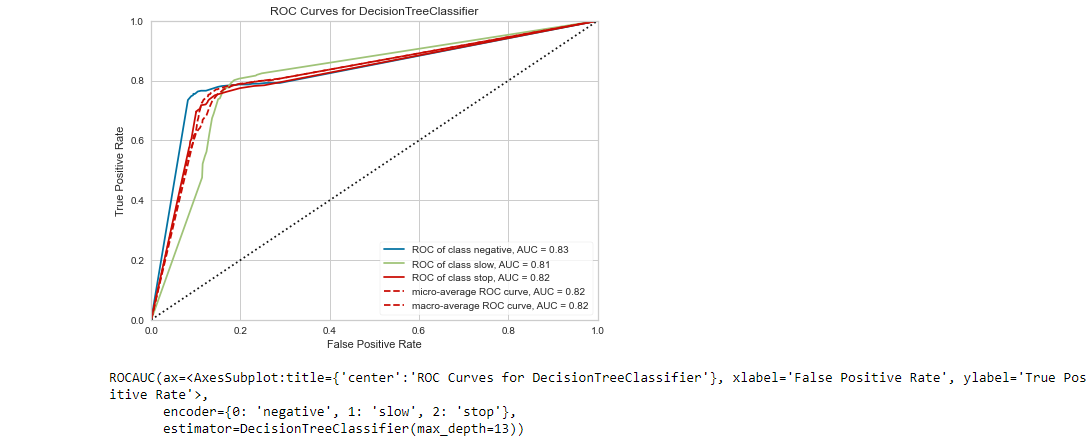

# RANDOM FOREST

In [163]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 100)

model_rf.fit(x_train, y_train)
joblib.dump(model_rf,"model_rf")

y_pred2 = model_rf.predict(x_test)
print("Random Forest Clasifier")
print("Train Accuracy:",model_rf.score(x_train, y_train))
print("Test Accuracy:",model_rf.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred2, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred2, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred2, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred2,))

Random Forest Clasifier
Train Accuracy: 1.0
Test Accuracy: 0.8327526132404182
Precision Score:  0.8327526132404182
Recall Score:  0.8327526132404182
F1 Score:  0.8327526132404183
Confusion Matrix: 
[[ 99  51   0]
 [ 42 295   0]
 [  2   1  84]]


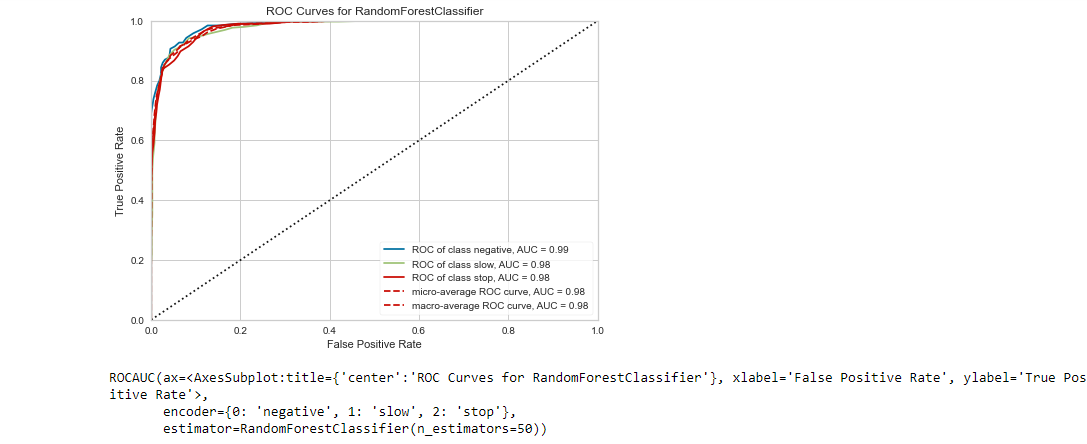

# KNN

In [164]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 5)
model_knn.fit(x_train, y_train)
joblib.dump(model_knn,"model_knn")
y_pred3 = model_knn.predict(x_test)
print("KNN")
print("Train Accuracy:",model_knn.score(x_train, y_train))
print("Test Accuracy:",model_knn.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred3, pos_label='positive', average='micro'))

KNN
Train Accuracy: 0.8644880174291939
Test Accuracy: 0.8344947735191638
Precision Score:  0.8344947735191638
Recall Score:  0.8344947735191638
F1 Score:  0.8344947735191638


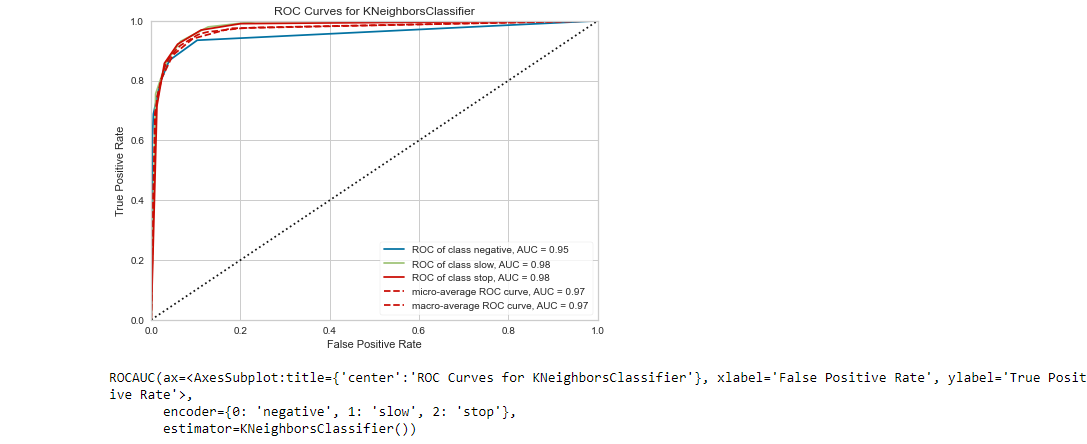

# SVM LINEAR

In [165]:
from sklearn import svm
model_svm_l = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo')
model_svm_l.fit(x_train, y_train)
joblib.dump(model_svm_l,"model_svm_l")
y_pred4 = model_svm_l.predict(x_test)
print("SVM Linear kernel")
print("Train Accuracy:",model_svm_l.score(x_train, y_train))
print("Test Accuracy:",model_svm_l.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred4, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred4, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred4, pos_label='positive', average='micro'))

SVM Linear kernel
Train Accuracy: 0.8383442265795207
Test Accuracy: 0.8449477351916377
Precision Score:  0.8449477351916377
Recall Score:  0.8449477351916377
F1 Score:  0.8449477351916377


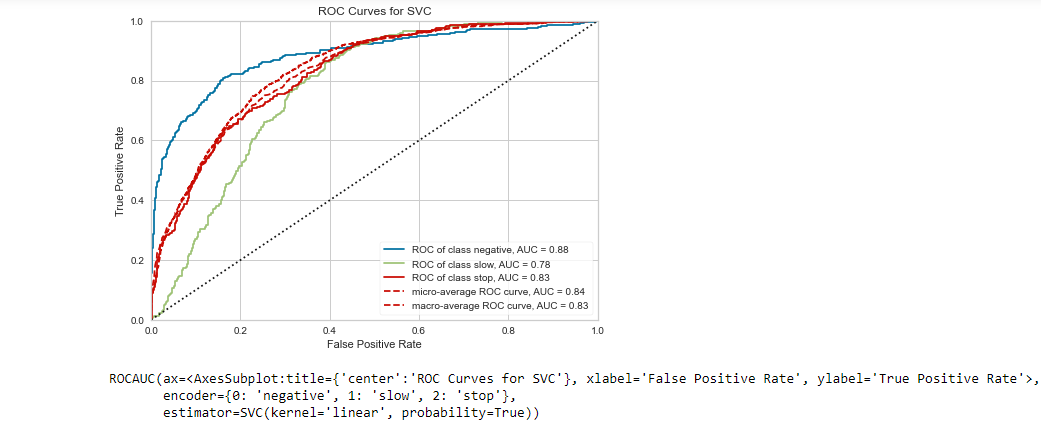

# SVM SIGMOID

In [166]:
from sklearn import svm
model_svm_s = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo')
model_svm_s.fit(x_train, y_train)
joblib.dump(model_svm_s,"model_svm_s")
y_pred5 = model_svm_s.predict(x_test)
print("SVM Sigmoid kernel")
print("Train Accuracy:",model_svm_s.score(x_train, y_train))
print("Test Accuracy:",model_svm_s.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred5, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred5, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred5, pos_label='positive', average='micro'))

SVM Sigmoid kernel
Train Accuracy: 0.7372549019607844
Test Accuracy: 0.7770034843205574
Precision Score:  0.7770034843205574
Recall Score:  0.7770034843205574
F1 Score:  0.7770034843205574


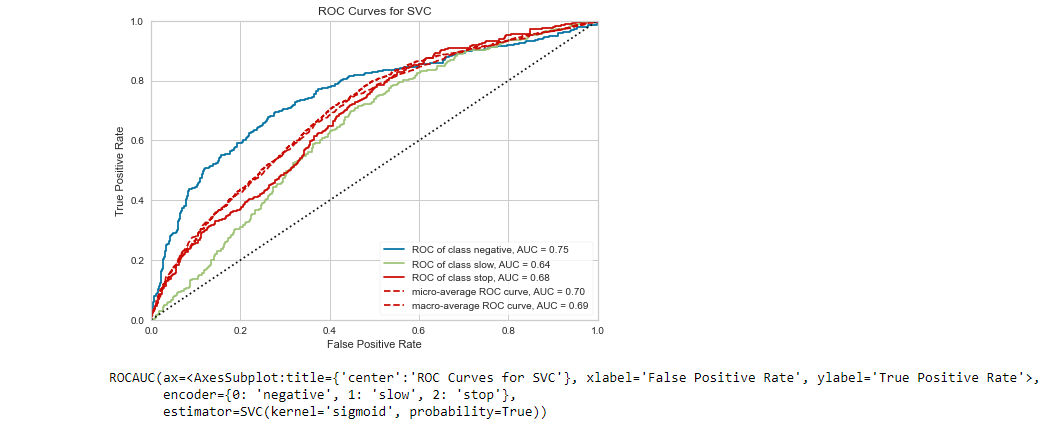

# SVM POLY


In [167]:
from sklearn import svm
model_svm_p = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo')
model_svm_p.fit(x_train, y_train)
joblib.dump(model_svm_p,"model_svm_p")
y_pred6 = model_svm_p.predict(x_test)
print("SVM Poly kernel")
print("Train Accuracy:",model_svm_p.score(x_train, y_train))
print("Test Accuracy:",model_svm_p.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred6, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred6, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred6, pos_label='positive', average='micro'))

SVM Poly kernel
Train Accuracy: 0.8374727668845315
Test Accuracy: 0.8153310104529616
Precision Score:  0.8153310104529616
Recall Score:  0.8153310104529616
F1 Score:  0.8153310104529616


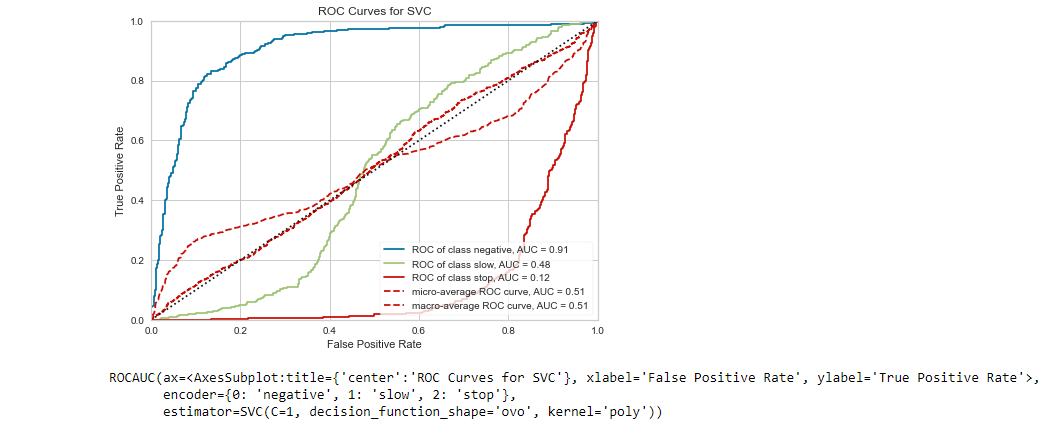

# SVM RBF

In [168]:
from sklearn import svm
model_svm_r = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo')
model_svm_r.fit(x_train, y_train)
joblib.dump(model_svm_r,"model_svm_r")
y_pred7 = model_svm_r.predict(x_test)
print("SVM RBF kernel")
print("Train Accuracy:",model_svm_r.score(x_train, y_train))
print("Test Accuracy:",model_svm_r.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred7, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred7, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred7, pos_label='positive', average='micro'))

SVM RBF kernel
Train Accuracy: 1.0
Test Accuracy: 0.6533101045296167
Precision Score:  0.6533101045296167
Recall Score:  0.6533101045296167
F1 Score:  0.6533101045296167


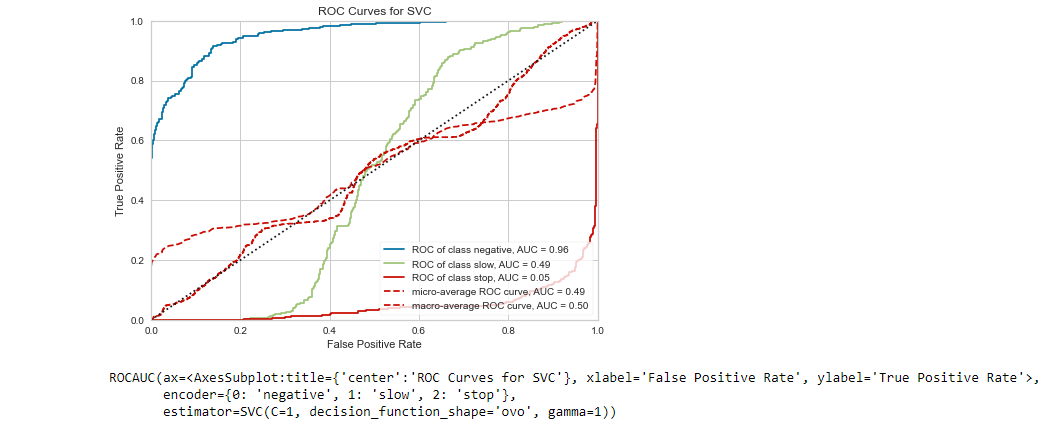

In [169]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB().fit(x_train, y_train)
joblib.dump(model_nb,"model_nb")
y_pred8 = model_nb.predict(x_test)
print("Gaussian NB")
print("Train Accuracy:",model_nb.score(x_train, y_train))
print("Test Accuracy:",model_nb.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred8, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred8, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred8, pos_label='positive', average='micro'))

Gaussian NB
Train Accuracy: 0.8217864923747277
Test Accuracy: 0.8292682926829268
Precision Score:  0.8292682926829268
Recall Score:  0.8292682926829268
F1 Score:  0.8292682926829268


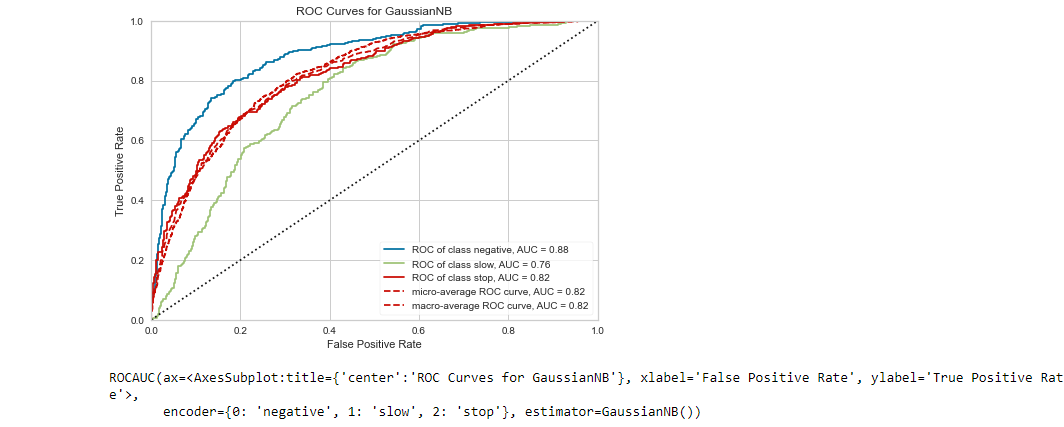

# VOTING CLASSIFIER

In [170]:
from sklearn.ensemble import VotingClassifier

model_voting = VotingClassifier( estimators=[('DT', model_dt ), ('RF', model_rf),('KNN', model_knn), ('SCVP', model_svm_p), 
                                           ('GuassianNB', model_nb)], voting='hard')
model_voting.fit(x_train, y_train)
voting_pred = model_voting.predict(x_test)
joblib.dump(model_voting,"model_voting")
CM = confusion_matrix(y_test, voting_pred)
print("Voting Classifier Hard")
print("Train Accuracy:",model_voting.score(x_train, y_train))
print("Test Accuracy:",model_voting.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, voting_pred,pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, voting_pred,pos_label='positive', average='micro'))
print("F2 Score: ",metrics.fbeta_score(y_test, voting_pred,pos_label='positive', average='micro',beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, voting_pred,pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, voting_pred))

Voting Classifier Hard
Train Accuracy: 0.9394335511982571
Test Accuracy: 0.8432055749128919
Precision Score:  0.8432055749128919
Recall Score:  0.8432055749128919
F2 Score:  0.8432055749128919
F1 Score:  0.8432055749128919
Confusion Matrix: 
[[ 98  52   0]
 [ 36 301   0]
 [  1   1  85]]


# Training

### DEFINING PATH OF FOLDER

In [171]:
folder_n_t=r"D:\Braintumour\dataset\Testing\no_tumor"
folder_glioma_t=r"D:\Braintumour\dataset\Training\glioma_tumor"
folder_meningioma_t=r"D:\Braintumour\dataset\Training\meningioma_tumor"
folder_pituitary_t=r"D:\Braintumour\dataset\Training\pituitary_tumor"

### LOADING BRISK KMENS MODEL 

In [172]:
kmeans = pickle.load(open('D:\\Braintumour\\pickel_model\\Kmeans_BRISK_Model.sav','rb'))

In [173]:
#performing kmeans prediction of the entire  dataset with the pretrained kmeans model

#initialising i=0; as its the 1st class

i=0
data=[]
c=0

for filename in os.listdir(folder_n_t):
    #path
    path=os.path.join(folder_n_t,filename)
    a=cv2.imread(path)

    #resize image
    resize=(150, 150)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #brisk code for feature descriptor
    brisk = cv2.BRISK_create()
    keypoint,descriptor = brisk.detectAndCompute(gray,None)
    
    out=pd.DataFrame(descriptor)
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoint))
    c=c+1
    if c==2000:
        break
    
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('D:\\Braintumour\\dataset\\Testing\\Negative_Prediction_B.csv', mode='a',header=False,index=False)

In [174]:
#performing kmeans prediction of the entire dataset with the pretrained kmeans model

#initialising i=1; as its the 2nd class
i=1
data=[]
k=0
for filename in os.listdir(folder_glioma_t):
    path=os.path.join(folder_glioma_t,filename)
    a=cv2.imread(path)
    resize=(150, 150)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #brisk code for feature descriptor
    brisk = cv2.BRISK_create()
    keypoint,descriptor = brisk.detectAndCompute(gray,None)
    
    out=pd.DataFrame(descriptor)
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoint))
    k=k+1
    if k==2000:
        break;
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data =Output.to_csv('D:\\Braintumour\\dataset\\Testing\\glioma_prediction_B.csv', mode='a',header=False,index=False)

In [175]:
#performing kmeans prediction of the entire dataset with the pretrained kmeans model

#initialising i=1; as its the 2nd class
i=2
data=[]
k=0
for filename in os.listdir(folder_meningioma_t):
    path=os.path.join(folder_meningioma_t,filename)
    a=cv2.imread(path)
    resize=(150, 150)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #brisk code for feature descriptor
    brisk = cv2.BRISK_create()
    keypoint,descriptor = brisk.detectAndCompute(gray,None)
    
    out=pd.DataFrame(descriptor)
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoint))
    k=k+1
    if k==2000:
        break;
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data =Output.to_csv('D:\\Braintumour\\dataset\\Testing\\meningioma_prediction_B.csv', mode='a',header=False,index=False)

In [176]:
#performing kmeans prediction of the entire dataset with the pretrained kmeans model

#initialising i=1; as its the 2nd class
i=2
data=[]
k=0
for filename in os.listdir(folder_pituitary_t):
    path=os.path.join(folder_pituitary_t,filename)
    a=cv2.imread(path)
    resize=(150, 150)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #brisk code for feature descriptor
    brisk = cv2.BRISK_create()
    keypoint,descriptor = brisk.detectAndCompute(gray,None)
    
    out=pd.DataFrame(descriptor)
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoint))
    k=k+1
    if k==2000:
        break;
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data =Output.to_csv('D:\\Braintumour\\dataset\\Testing\\pituitary_prediction_B.csv', mode='a',header=False,index=False)

In [177]:
#Displaying the kmeans predicted data
print("Negative Images")
dat1_B = pd.read_csv(r'D:\\Braintumour\\dataset\\Testing\\Negative_Prediction_B.csv',header=None)
print(dat1_B)

Negative Images
           0         1         2         3         4         5         6    
0    0.051282  0.064103  0.153846  0.128205  0.076923  0.038462  0.051282  \
1    0.149038  0.076923  0.052885  0.076923  0.144231  0.067308  0.062500   
2    0.084211  0.115789  0.021053  0.084211  0.105263  0.084211  0.094737   
3    0.060606  0.219697  0.079545  0.087121  0.136364  0.083333  0.109848   
4    0.032967  0.197802  0.038462  0.098901  0.087912  0.076923  0.115385   
..        ...       ...       ...       ...       ...       ...       ...   
205  0.097166  0.109312  0.048583  0.052632  0.190283  0.076923  0.117409   
206  0.024390  0.138211  0.113821  0.089431  0.154472  0.016260  0.032520   
207  0.222222  0.111111  0.203704  0.037037  0.018519  0.055556  0.074074   
208  0.051095  0.094891  0.032847  0.091241  0.087591  0.167883  0.131387   
209  0.054902  0.082353  0.043137  0.066667  0.145098  0.156863  0.121569   

           7         8         9   10  
0    0.269231  0.07

In [178]:
print("GLIOMA BRAIN TUMOUR")
dat2_B = pd.read_csv(r'D:\\Braintumour\\dataset\\Testing\\glioma_prediction_B.csv',header=None)
print(dat2_B)

GLIOMA BRAIN TUMOUR
            0         1         2         3         4         5         6    
0     0.093750  0.062500  0.208333  0.156250  0.083333  0.020833  0.041667  \
1     0.038961  0.064935  0.207792  0.019481  0.038961  0.038961  0.136364   
2     0.021978  0.131868  0.071429  0.120879  0.065934  0.093407  0.164835   
3     0.055300  0.188940  0.069124  0.087558  0.119816  0.082949  0.078341   
4     0.051136  0.096591  0.085227  0.102273  0.142045  0.136364  0.073864   
...        ...       ...       ...       ...       ...       ...       ...   
1647  0.072917  0.192708  0.125000  0.067708  0.119792  0.104167  0.130208   
1648  0.041096  0.150685  0.050228  0.091324  0.136986  0.086758  0.136986   
1649  0.050459  0.146789  0.073394  0.059633  0.091743  0.133028  0.110092   
1650  0.050505  0.121212  0.060606  0.075758  0.131313  0.106061  0.126263   
1651  0.048780  0.105691  0.105691  0.081301  0.089431  0.146341  0.097561   

            7         8         9   10  
0 

In [179]:
print("MENINGIOMA BRAIN TUMOUR")
dat3_B = pd.read_csv(r'D:\\Braintumour\\dataset\\Testing\\meningioma_prediction_B.csv',header=None)
print(dat3_B)

MENINGIOMA BRAIN TUMOUR
            0         1         2         3         4         5         6    
0     0.061856  0.170103  0.087629  0.067010  0.087629  0.056701  0.144330  \
1     0.046243  0.040462  0.109827  0.046243  0.098266  0.098266  0.052023   
2     0.090909  0.042424  0.127273  0.048485  0.060606  0.018182  0.109091   
3     0.061889  0.091205  0.117264  0.068404  0.097720  0.127036  0.133550   
4     0.063025  0.063025  0.071429  0.058824  0.126050  0.117647  0.147059   
...        ...       ...       ...       ...       ...       ...       ...   
1639  0.083832  0.197605  0.065868  0.077844  0.119760  0.119760  0.083832   
1640  0.087719  0.131579  0.057018  0.092105  0.118421  0.157895  0.078947   
1641  0.091549  0.133803  0.119718  0.105634  0.140845  0.084507  0.077465   
1642  0.084746  0.169492  0.050847  0.135593  0.152542  0.067797  0.084746   
1643  0.092025  0.098160  0.110429  0.079755  0.147239  0.079755  0.085890   

            7         8         9   10 

In [180]:
print("PITUTITARY BRAIN TUMOUR")
dat4_B = pd.read_csv(r'D:\\Braintumour\\dataset\\Testing\\pituitary_prediction_B.csv',header=None)
print(dat4_B)

PITUTITARY BRAIN TUMOUR
            0         1         2         3         4         5         6    
0     0.086466  0.082707  0.093985  0.116541  0.116541  0.093985  0.067669  \
1     0.081522  0.135870  0.114130  0.141304  0.119565  0.043478  0.054348   
2     0.080000  0.156000  0.108000  0.084000  0.080000  0.104000  0.116000   
3     0.067265  0.130045  0.062780  0.125561  0.139013  0.089686  0.116592   
4     0.117647  0.122995  0.122995  0.139037  0.122995  0.096257  0.074866   
...        ...       ...       ...       ...       ...       ...       ...   
1649  0.048889  0.142222  0.075556  0.155556  0.097778  0.128889  0.088889   
1650  0.112971  0.146444  0.062762  0.163180  0.083682  0.121339  0.083682   
1651  0.120773  0.169082  0.096618  0.130435  0.091787  0.091787  0.101449   
1652  0.094527  0.169154  0.094527  0.059701  0.119403  0.104478  0.089552   
1653  0.075676  0.145946  0.097297  0.086486  0.129730  0.102703  0.145946   

            7         8         9   10 

In [181]:
A=pd.concat([dat1_B,dat2_B,dat3_B,dat4_B])
csv_data=A.to_csv('D:\\Braintumour\\dataset\\Testing\\FinalBRISK.csv', mode='a',header=False,index=False)

In [182]:
brisk_t = pd.read_csv('D:\\Braintumour\\dataset\\Testing\\FinalBRISK.csv',header=None)
brisk_t

,0,1,2,3,4,5,6,7,8,9,10
0,0.051282,0.064103,0.153846,0.128205,0.076923,0.038462,0.051282,0.269231,0.076923,0.089744,0
1,0.149038,0.076923,0.052885,0.076923,0.144231,0.067308,0.062500,0.144231,0.149038,0.076923,0
2,0.084211,0.115789,0.021053,0.084211,0.105263,0.084211,0.094737,0.178947,0.200000,0.031579,0
3,0.060606,0.219697,0.079545,0.087121,0.136364,0.083333,0.109848,0.037879,0.106061,0.079545,0
4,0.032967,0.197802,0.038462,0.098901,0.087912,0.076923,0.115385,0.115385,0.153846,0.082418,0
...,...,...,...,...,...,...,...,...,...,...,...
7735,0.048889,0.142222,0.075556,0.155556,0.097778,0.128889,0.088889,0.062222,0.146667,0.053333,2
7736,0.112971,0.146444,0.062762,0.163180,0.083682,0.121339,0.083682,0.029289,0.129707,0.066946,2
7737,0.120773,0.169082,0.096618,0.130435,0.091787,0.091787,0.101449,0.038647,0.106280,0.053140,2
7738,0.094527,0.169154,0.094527,0.059701,0.119403,0.104478,0.089552,0.049751,0.124378,0.094527,2


# FREAK

### LOADING FREAK KMEANS MODEL 

In [183]:
kmeans_freak = pickle.load(open('D:\\Braintumour\\pickel_model\\Kmeans_FREAK_Model.sav','rb'))

In [184]:
#performing kmeans prediction of the entire dataset with the pretrained kmeans model

#initialising i=0; as its the first class
i=0
data=[]
c=0

for filename in os.listdir(folder_n_t):
    #path
    path=os.path.join(folder_n_t,filename)
    a=cv2.imread(path)

    #resize image
    resize=(150, 150)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #keypoints
    brisk = cv2.BRISK_create()
    keypoints,d = brisk.detectAndCompute(gray,None)
        
    #initialise descriptor
    freak = cv2.xfeatures2d.FREAK_create()
    keypoints,descriptors= freak.compute(gray,keypoints)
    out=pd.DataFrame(descriptors)
    
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans_freak.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoints))
    c=c+1
    if c==2000:
        break
    
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('D:\\Braintumour\\dataset\\Testing\\Negative_Prediction_F.csv', mode='a',header=False,index=False)

In [185]:
#performing kmeans prediction of the entire  dataset with the pretrained kmeans model

#initialising i=1; as its the 2nd class
i=1
data=[]
k=0
for filename in os.listdir(folder_glioma_t):
    path=os.path.join(folder_glioma_t,filename)
    a=cv2.imread(path)
    resize=(150, 150)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   
    #keypoints
    brisk = cv2.BRISK_create()
    keypoints,d = brisk.detectAndCompute(gray,None)
        
    #initialise descriptor
    freak = cv2.xfeatures2d.FREAK_create()
    keypoints,descriptors= freak.compute(gray,keypoints)
    out=pd.DataFrame(descriptors)
    
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans_freak.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoints))
    k=k+1
    if k==2000:
        break;
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data =Output.to_csv('D:\\Braintumour\\dataset\\Testing\\glioma_prediction_F.csv', mode='a',header=False,index=False)

In [186]:
#performing kmeans prediction of the entire dataset with the pretrained kmeans model

#initialising i=2; as its the 3rd class
i=2
data=[]
k=0
for filename in os.listdir(folder_meningioma_t):
    path=os.path.join(folder_meningioma_t,filename)
    a=cv2.imread(path)
    resize=(150, 150)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #keypoints
    brisk = cv2.BRISK_create()
    keypoints,d = brisk.detectAndCompute(gray,None)
        
    #initialise descriptor
    freak = cv2.xfeatures2d.FREAK_create()
    keypoints,descriptors= freak.compute(gray,keypoints)
    out=pd.DataFrame(descriptors)
    
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans_freak.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoints))
    k=k+1
    if k==2000:
        break;
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data =Output.to_csv('D:\\Braintumour\\dataset\\Testing\\meningioma_prediction_F.csv', mode='a',header=False,index=False)

In [187]:
#performing kmeans prediction of the entire dataset with the pretrained kmeans model

#initialising i=2; as its the 3rd class
i=2
data=[]
k=0
for filename in os.listdir(folder_pituitary_t):
    path=os.path.join(folder_pituitary_t,filename)
    a=cv2.imread(path)
    resize=(150, 150)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #keypoints
    brisk = cv2.BRISK_create()
    keypoints,d = brisk.detectAndCompute(gray,None)
        
    #initialise descriptor
    freak = cv2.xfeatures2d.FREAK_create()
    keypoints,descriptors= freak.compute(gray,keypoints)
    out=pd.DataFrame(descriptors)
    
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans_freak.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoints))
    k=k+1
    if k==2000:
        break;
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data =Output.to_csv('D:\\Braintumour\\dataset\\Testing\\pituitary_prediction_F.csv', mode='a',header=False,index=False)

In [188]:
#Displaying the kmeans predicted data
print("Negative Images")
dat1_f_t = pd.read_csv(r'D:\\Braintumour\\dataset\\Testing\\Negative_Prediction_F.csv',header=None)
print(dat1_f_t)

Negative Images
           0         1         2         3         4         5         6    
0    0.033333  0.000000  0.000000  0.233333  0.033333  0.066667  0.200000  \
1    0.172414  0.091954  0.091954  0.160920  0.080460  0.057471  0.149425   
2    0.222222  0.000000  0.155556  0.066667  0.066667  0.066667  0.111111   
3    0.078431  0.000000  0.372549  0.215686  0.000000  0.019608  0.137255   
4    0.040000  0.060000  0.180000  0.220000  0.100000  0.140000  0.120000   
..        ...       ...       ...       ...       ...       ...       ...   
205  0.110000  0.050000  0.060000  0.090000  0.120000  0.090000  0.020000   
206  0.071429  0.000000  0.285714  0.214286  0.071429  0.071429  0.071429   
207  0.000000  0.111111  0.222222  0.111111  0.111111  0.111111  0.000000   
208  0.132075  0.075472  0.188679  0.075472  0.113208  0.113208  0.056604   
209  0.061224  0.081633  0.102041  0.132653  0.091837  0.061224  0.122449   

           7         8         9   10  
0    0.100000  0.10

In [189]:
print("GLIOMA BRAIN TUMOUR")
dat2_f = pd.read_csv(r'D:\\Braintumour\\dataset\\Testing\\glioma_prediction_F.csv',header=None)
print(dat2_f)

GLIOMA BRAIN TUMOUR
            0         1         2         3         4         5         6    
0     0.125000  0.050000  0.050000  0.000000  0.100000  0.125000  0.050000  \
1     0.152174  0.108696  0.108696  0.043478  0.108696  0.065217  0.021739   
2     0.027778  0.166667  0.125000  0.152778  0.097222  0.111111  0.041667   
3     0.000000  0.189873  0.177215  0.126582  0.050633  0.088608  0.050633   
4     0.065574  0.114754  0.229508  0.065574  0.081967  0.098361  0.114754   
...        ...       ...       ...       ...       ...       ...       ...   
1647  0.102564  0.064103  0.179487  0.128205  0.025641  0.115385  0.102564   
1648  0.067568  0.135135  0.229730  0.040541  0.040541  0.189189  0.067568   
1649  0.070588  0.105882  0.164706  0.023529  0.058824  0.094118  0.129412   
1650  0.123596  0.067416  0.134831  0.123596  0.157303  0.101124  0.056180   
1651  0.018519  0.148148  0.129630  0.148148  0.074074  0.074074  0.092593   

            7         8         9   10  
0 

In [190]:
print("MENINGIOMA BRAIN TUMOUR")
dat3_f = pd.read_csv(r'D:\\Braintumour\\dataset\\Testing\\meningioma_prediction_F.csv',header=None)
print(dat3_f)

MENINGIOMA BRAIN TUMOUR
            0         1         2         3         4         5         6    
0     0.101124  0.067416  0.280899  0.022472  0.112360  0.078652  0.067416  \
1     0.129032  0.064516  0.064516  0.096774  0.096774  0.064516  0.000000   
2     0.170732  0.073171  0.073171  0.000000  0.048780  0.097561  0.097561   
3     0.127273  0.090909  0.209091  0.036364  0.045455  0.154545  0.081818   
4     0.148148  0.086420  0.098765  0.111111  0.098765  0.135802  0.037037   
...        ...       ...       ...       ...       ...       ...       ...   
1639  0.015873  0.111111  0.142857  0.174603  0.111111  0.142857  0.126984   
1640  0.133333  0.088889  0.166667  0.111111  0.088889  0.155556  0.100000   
1641  0.070175  0.175439  0.210526  0.070175  0.122807  0.140351  0.070175   
1642  0.162791  0.069767  0.395349  0.139535  0.023256  0.093023  0.069767   
1643  0.134328  0.134328  0.044776  0.149254  0.089552  0.074627  0.074627   

            7         8         9   10 

In [191]:
print("PITUTITARY BRAIN TUMOUR")
dat4_f = pd.read_csv(r'D:\\Braintumour\\dataset\\Testing\\pituitary_prediction_F.csv',header=None)
print(dat4_f)

PITUTITARY BRAIN TUMOUR
            0         1         2         3         4         5         6    
0     0.101266  0.113924  0.101266  0.088608  0.126582  0.088608  0.063291  \
1     0.211538  0.038462  0.057692  0.269231  0.057692  0.038462  0.230769   
2     0.088608  0.088608  0.189873  0.101266  0.113924  0.151899  0.050633   
3     0.217949  0.076923  0.102564  0.051282  0.076923  0.141026  0.128205   
4     0.180000  0.060000  0.280000  0.160000  0.020000  0.040000  0.040000   
...        ...       ...       ...       ...       ...       ...       ...   
1649  0.075472  0.113208  0.113208  0.103774  0.047170  0.122642  0.132075   
1650  0.153846  0.076923  0.115385  0.192308  0.038462  0.057692  0.163462   
1651  0.146067  0.067416  0.213483  0.168539  0.123596  0.033708  0.134831   
1652  0.114754  0.114754  0.262295  0.147541  0.032787  0.081967  0.065574   
1653  0.111111  0.166667  0.166667  0.111111  0.111111  0.037037  0.074074   

            7         8         9   10 

In [192]:
B=pd.concat([dat1_f_t,dat2_f,dat3_f,dat4_f])
csv_data_f=B.to_csv('D:\\Braintumour\\dataset\\Testing\\FinalFREAK.csv', mode='a',header=False,index=False)

In [193]:
B

,0,1,2,3,4,5,6,7,8,9,10
0,0.033333,0.000000,0.000000,0.233333,0.033333,0.066667,0.200000,0.100000,0.100000,0.233333,0
1,0.172414,0.091954,0.091954,0.160920,0.080460,0.057471,0.149425,0.091954,0.068966,0.034483,0
2,0.222222,0.000000,0.155556,0.066667,0.066667,0.066667,0.111111,0.111111,0.111111,0.088889,0
3,0.078431,0.000000,0.372549,0.215686,0.000000,0.019608,0.137255,0.019608,0.000000,0.156863,0
4,0.040000,0.060000,0.180000,0.220000,0.100000,0.140000,0.120000,0.040000,0.040000,0.060000,0
...,...,...,...,...,...,...,...,...,...,...,...
1649,0.075472,0.113208,0.113208,0.103774,0.047170,0.122642,0.132075,0.122642,0.028302,0.141509,2
1650,0.153846,0.076923,0.115385,0.192308,0.038462,0.057692,0.163462,0.115385,0.000000,0.086538,2
1651,0.146067,0.067416,0.213483,0.168539,0.123596,0.033708,0.134831,0.067416,0.000000,0.044944,2
1652,0.114754,0.114754,0.262295,0.147541,0.032787,0.081967,0.065574,0.032787,0.016393,0.131148,2


# COMBINIG BRISK + FREAK

In [194]:
pd1=pd.read_csv('D:\\Braintumour\\dataset\\Testing\\FinalBRISK.csv',header=None)
pd2=pd.read_csv('D:\\Braintumour\\dataset\\Testing\\FinalFREAK.csv',header=None)
df1=pd.DataFrame(pd1)
df1 = df1.iloc[: , :-1]
df2=pd.DataFrame(pd2)

In [195]:
fpd=pd.concat([df1, df2], axis=1)
csv_data=fpd.to_csv('D:\\Braintumour\\dataset\\Testing\\FinalPretrainedBriskFreak.csv', mode='w',header=False,index=False)

In [196]:
test_data = pd.read_csv('D:\\Braintumour\\dataset\\Testing\\FinalPretrainedBriskFreak.csv',header=None)

In [197]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.051282,0.064103,0.153846,0.128205,0.076923,0.038462,0.051282,0.269231,0.076923,0.089744,...,0.000000,0.000000,0.233333,0.033333,0.066667,0.200000,0.100000,0.100000,0.233333,0
1,0.149038,0.076923,0.052885,0.076923,0.144231,0.067308,0.062500,0.144231,0.149038,0.076923,...,0.091954,0.091954,0.160920,0.080460,0.057471,0.149425,0.091954,0.068966,0.034483,0
2,0.084211,0.115789,0.021053,0.084211,0.105263,0.084211,0.094737,0.178947,0.200000,0.031579,...,0.000000,0.155556,0.066667,0.066667,0.066667,0.111111,0.111111,0.111111,0.088889,0
3,0.060606,0.219697,0.079545,0.087121,0.136364,0.083333,0.109848,0.037879,0.106061,0.079545,...,0.000000,0.372549,0.215686,0.000000,0.019608,0.137255,0.019608,0.000000,0.156863,0
4,0.032967,0.197802,0.038462,0.098901,0.087912,0.076923,0.115385,0.115385,0.153846,0.082418,...,0.060000,0.180000,0.220000,0.100000,0.140000,0.120000,0.040000,0.040000,0.060000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7735,0.048889,0.142222,0.075556,0.155556,0.097778,0.128889,0.088889,0.062222,0.146667,0.053333,...,0.113208,0.113208,0.103774,0.047170,0.122642,0.132075,0.122642,0.028302,0.141509,2
7736,0.112971,0.146444,0.062762,0.163180,0.083682,0.121339,0.083682,0.029289,0.129707,0.066946,...,0.076923,0.115385,0.192308,0.038462,0.057692,0.163462,0.115385,0.000000,0.086538,2
7737,0.120773,0.169082,0.096618,0.130435,0.091787,0.091787,0.101449,0.038647,0.106280,0.053140,...,0.067416,0.213483,0.168539,0.123596,0.033708,0.134831,0.067416,0.000000,0.044944,2
7738,0.094527,0.169154,0.094527,0.059701,0.119403,0.104478,0.089552,0.049751,0.124378,0.094527,...,0.114754,0.262295,0.147541,0.032787,0.081967,0.065574,0.032787,0.016393,0.131148,2


In [198]:
x = test_data.iloc[:,0:20].values

In [199]:
x

array([[0.05128205, 0.06410256, 0.15384615, ..., 0.1       , 0.1       ,
        0.23333333],
       [0.14903846, 0.07692308, 0.05288462, ..., 0.09195402, 0.06896552,
        0.03448276],
       [0.08421053, 0.11578947, 0.02105263, ..., 0.11111111, 0.11111111,
        0.08888889],
       ...,
       [0.12077295, 0.16908213, 0.09661836, ..., 0.06741573, 0.        ,
        0.04494382],
       [0.09452736, 0.16915423, 0.09452736, ..., 0.03278689, 0.01639344,
        0.13114754],
       [0.07567568, 0.14594595, 0.0972973 , ..., 0.11111111, 0.        ,
        0.11111111]])

In [200]:
y = test_data.iloc[:,20].values

In [201]:
y

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

# USING PCA FOR DIMENSIONALITY REDUCTION

In [202]:
from sklearn.preprocessing import StandardScaler
DhoniS = StandardScaler()
Dhoni = DhoniS.fit_transform(x)

In [203]:
Dhoni

array([[-0.60392412, -1.14989251,  1.23327632, ..., -0.12650221,
         0.23955204,  2.2693485 ],
       [ 1.97325086, -0.89553216, -0.92099746, ..., -0.24304191,
        -0.14374278, -0.98089272],
       [ 0.26417693, -0.12441866, -1.60021461, ...,  0.03443357,
         0.37678105, -0.0916167 ],
       ...,
       [ 1.22808052,  0.9329133 ,  0.01217427, ..., -0.59845994,
        -0.99550905, -0.80990516],
       [ 0.5361621 ,  0.93434383, -0.03244246, ..., -1.10003174,
        -0.79304002,  0.59910704],
       [ 0.03917068,  0.473889  ,  0.0266612 , ...,  0.03443357,
        -0.99550905,  0.27160872]])

In [204]:
pca = pickle.load(open('D:\\Braintumour\\pickel_model\\PCA_Model.sav','rb'))

In [205]:
Bhumi = pca.transform(Dhoni)

In [206]:
Bhumi

array([[ 1.49709103,  1.10631532,  0.15714247, ..., -0.19226659,
        -0.22576421, -1.51518974],
       [-0.51263894,  0.89329737,  1.66119147, ..., -0.59709974,
         0.82241407,  0.36023279],
       [-1.01991147, -0.81422569,  1.14342894, ..., -0.04475758,
         0.42261594,  0.45676201],
       ...,
       [-2.03382731,  1.37217891,  0.64361007, ...,  0.60404378,
        -0.99465532, -0.53244067],
       [-1.59281439,  0.2730143 , -0.06957024, ..., -0.11876488,
        -0.30600218,  1.06797636],
       [-1.25081266, -0.36106365, -0.81682705, ...,  0.10005012,
        -0.3079997 ,  0.17326982]])

In [207]:
B1= pd.DataFrame(Bhumi)
B1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.497091,1.106315,0.157142,-3.387286,3.027115,-0.416670,0.958904,1.412137,0.805333,1.898382,-1.340029,-0.119108,-0.195620,0.723684,-0.192267,-0.225764,-1.515190
1,-0.512639,0.893297,1.661191,-0.007986,-0.425134,-0.689336,-0.707497,1.713122,1.263004,-0.244902,0.186770,-0.918223,-0.652729,0.617052,-0.597100,0.822414,0.360233
2,-1.019911,-0.814226,1.143429,-0.650552,0.002792,0.676571,-0.009833,2.362834,-0.804524,0.356777,1.376344,-0.142747,-1.577787,1.159890,-0.044758,0.422616,0.456762
3,-3.466703,0.890277,0.348328,-0.924957,2.016249,2.323474,-0.665386,-1.535280,-0.114808,0.420400,0.553582,1.104994,-0.455451,-0.220247,-0.172196,-0.510282,0.667815
4,-1.890356,-0.846344,-0.035975,0.770278,1.594798,0.617704,1.100389,-0.342139,0.459276,0.032788,0.202079,-0.645237,-0.559299,0.876207,1.564416,-0.590588,-0.248156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7735,-1.668671,-0.927877,-0.920948,-0.317025,-0.164120,-0.248345,0.589402,0.701969,-0.174426,0.262707,-1.399816,0.229903,0.230946,-0.732823,0.892663,0.267124,-0.870111
7736,-2.415827,0.726467,0.427536,-0.335158,-0.588223,-0.625454,-0.792799,1.020986,0.171730,0.971173,-0.675261,-0.345216,-0.342686,-1.121616,0.912075,-0.195961,-0.699778
7737,-2.033827,1.372179,0.643610,0.462766,-0.409769,0.017858,-1.190126,-0.064789,0.444687,0.314106,0.592307,0.269102,0.173798,0.085429,0.604044,-0.994655,-0.532441
7738,-1.592814,0.273014,-0.069570,-0.197667,-0.221590,1.731508,-0.447950,-0.796822,0.350856,-0.982926,-0.421674,-0.087193,0.086607,-0.406714,-0.118765,-0.306002,1.067976


In [208]:
B2=pd.concat([B1, pd.DataFrame(y)],axis=1)
B2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,0
0,1.497091,1.106315,0.157142,-3.387286,3.027115,-0.416670,0.958904,1.412137,0.805333,1.898382,-1.340029,-0.119108,-0.195620,0.723684,-0.192267,-0.225764,-1.515190,0
1,-0.512639,0.893297,1.661191,-0.007986,-0.425134,-0.689336,-0.707497,1.713122,1.263004,-0.244902,0.186770,-0.918223,-0.652729,0.617052,-0.597100,0.822414,0.360233,0
2,-1.019911,-0.814226,1.143429,-0.650552,0.002792,0.676571,-0.009833,2.362834,-0.804524,0.356777,1.376344,-0.142747,-1.577787,1.159890,-0.044758,0.422616,0.456762,0
3,-3.466703,0.890277,0.348328,-0.924957,2.016249,2.323474,-0.665386,-1.535280,-0.114808,0.420400,0.553582,1.104994,-0.455451,-0.220247,-0.172196,-0.510282,0.667815,0
4,-1.890356,-0.846344,-0.035975,0.770278,1.594798,0.617704,1.100389,-0.342139,0.459276,0.032788,0.202079,-0.645237,-0.559299,0.876207,1.564416,-0.590588,-0.248156,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7735,-1.668671,-0.927877,-0.920948,-0.317025,-0.164120,-0.248345,0.589402,0.701969,-0.174426,0.262707,-1.399816,0.229903,0.230946,-0.732823,0.892663,0.267124,-0.870111,2
7736,-2.415827,0.726467,0.427536,-0.335158,-0.588223,-0.625454,-0.792799,1.020986,0.171730,0.971173,-0.675261,-0.345216,-0.342686,-1.121616,0.912075,-0.195961,-0.699778,2
7737,-2.033827,1.372179,0.643610,0.462766,-0.409769,0.017858,-1.190126,-0.064789,0.444687,0.314106,0.592307,0.269102,0.173798,0.085429,0.604044,-0.994655,-0.532441,2
7738,-1.592814,0.273014,-0.069570,-0.197667,-0.221590,1.731508,-0.447950,-0.796822,0.350856,-0.982926,-0.421674,-0.087193,0.086607,-0.406714,-0.118765,-0.306002,1.067976,2


In [209]:
csv_data_t1=B2.to_csv('D:\\Braintumour\\dataset\\Testing\\FinalPCAFV.csv', mode='a',header=False,index=False)

In [210]:
data2= pd.read_csv(r'D:\\Braintumour\\dataset\\Testing\\FinalPCAFV.csv',header=None)
data2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.497091,1.106315,0.157142,-3.387286,3.027115,-0.416670,0.958904,1.412137,0.805333,1.898382,-1.340029,-0.119108,-0.195620,0.723684,-0.192267,-0.225764,-1.515190,0
1,-0.512639,0.893297,1.661191,-0.007986,-0.425134,-0.689336,-0.707497,1.713122,1.263004,-0.244902,0.186770,-0.918223,-0.652729,0.617052,-0.597100,0.822414,0.360233,0
2,-1.019911,-0.814226,1.143429,-0.650552,0.002792,0.676571,-0.009833,2.362834,-0.804524,0.356777,1.376344,-0.142747,-1.577787,1.159890,-0.044758,0.422616,0.456762,0
3,-3.466703,0.890277,0.348328,-0.924957,2.016249,2.323474,-0.665386,-1.535280,-0.114808,0.420400,0.553582,1.104994,-0.455451,-0.220247,-0.172196,-0.510282,0.667815,0
4,-1.890356,-0.846344,-0.035975,0.770278,1.594798,0.617704,1.100389,-0.342139,0.459276,0.032788,0.202079,-0.645237,-0.559299,0.876207,1.564416,-0.590588,-0.248156,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10315,-1.668671,-0.927877,-0.920948,-0.317025,-0.164120,-0.248345,0.589402,0.701969,-0.174426,0.262707,-1.399816,0.229903,0.230946,-0.732823,0.892663,0.267124,-0.870111,2
10316,-2.415827,0.726467,0.427536,-0.335158,-0.588223,-0.625454,-0.792799,1.020986,0.171730,0.971173,-0.675261,-0.345216,-0.342686,-1.121616,0.912075,-0.195961,-0.699778,2
10317,-2.033827,1.372179,0.643610,0.462766,-0.409769,0.017858,-1.190126,-0.064789,0.444687,0.314106,0.592307,0.269102,0.173798,0.085429,0.604044,-0.994655,-0.532441,2
10318,-1.592814,0.273014,-0.069570,-0.197667,-0.221590,1.731508,-0.447950,-0.796822,0.350856,-0.982926,-0.421674,-0.087193,0.086607,-0.406714,-0.118765,-0.306002,1.067976,2


In [211]:
#assigning x the columns from 1 to 128 for training
x1 = data2.iloc[:,0:17].values
print("X values")
print(x1)

#assigning y with the column "Class" as target variable
y1 = data2.iloc[:,17]
print("Y values")
print(y1)

X values
[[ 1.49709103  1.10631532  0.15714247 ... -0.19226659 -0.22576421
  -1.51518974]
 [-0.51263894  0.89329737  1.66119147 ... -0.59709974  0.82241407
   0.36023279]
 [-1.01991147 -0.81422569  1.14342894 ... -0.04475758  0.42261594
   0.45676201]
 ...
 [-2.03382731  1.37217891  0.64361007 ...  0.60404378 -0.99465532
  -0.53244067]
 [-1.59281439  0.2730143  -0.06957024 ... -0.11876488 -0.30600218
   1.06797636]
 [-1.25081266 -0.36106365 -0.81682705 ...  0.10005012 -0.3079997
   0.17326982]]
Y values
0        0
1        0
2        0
3        0
4        0
        ..
10315    2
10316    2
10317    2
10318    2
10319    2
Name: 17, Length: 10320, dtype: int64


In [212]:
import joblib

# DECISION TREE

In [213]:
model_dt = joblib.load("D:\\Braintumour\\models\\model_dt")
y_dt = model_dt.predict(x1)
print("Decision Tree Results")
print("Decision Tree Accuracy: ",accuracy_score(y1, y_dt)*100,"%")

Decision Tree Results
Decision Tree Accuracy:  82.17054263565892 %


# RANDOM FOREST

In [214]:
model_rf = joblib.load("D:\\Braintumour\\models\\model_rf")
y_rf = model_rf.predict(x1)
print("Random Forest Clasifier")
print("Random Forest Clasifier: ",accuracy_score(y1, y_rf)*100,"%")
print("Precision Score: ",metrics.precision_score(y1, y_rf, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y1, y_rf, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y1, y_rf, pos_label='positive', average='micro'))

Random Forest Clasifier
Random Forest Clasifier:  90.69767441860465 %
Precision Score:  0.9069767441860465
Recall Score:  0.9069767441860465
F1 Score:  0.9069767441860465


# KNN

In [215]:
model_knn = joblib.load("D:\\Braintumour\\models\\model_knn")
y_knn = model_knn.predict(x1)
print("KNN")
print("KNN: ",accuracy_score(y1, y_knn)*100,"%")
print("Precision Score: ",metrics.precision_score(y1, y_knn, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y1, y_knn, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y1, y_knn, pos_label='positive', average='micro'))

KNN
KNN:  80.11627906976744 %
Precision Score:  0.8011627906976744
Recall Score:  0.8011627906976744
F1 Score:  0.8011627906976744


# SVM LINEAR

In [216]:
model_svm = joblib.load("D:\\Braintumour\\models\\model_svm_l")
y_svm = model_svm.predict(x1)
print("SVM")
print("SVM: ",accuracy_score(y1, y_svm)*100,"%")
print("Precision Score: ",metrics.precision_score(y1, y_svm, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y1, y_svm, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y1, y_svm, pos_label='positive', average='micro'))

SVM
SVM:  77.13178294573643 %
Precision Score:  0.7713178294573644
Recall Score:  0.7713178294573644
F1 Score:  0.7713178294573645


# SVM SIGMOID

In [217]:
model_svm_s = joblib.load("D:\\Braintumour\\models\\model_svm_s")
y_svm_s = model_svm_s.predict(x1)
print("SVM")
print("SVM: ",accuracy_score(y1, y_svm_s)*100,"%")
print("Precision Score: ",metrics.precision_score(y1, y_svm_s, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y1, y_svm_s, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y1, y_svm_s, pos_label='positive', average='micro'))

SVM
SVM:  68.10077519379844 %
Precision Score:  0.6810077519379845
Recall Score:  0.6810077519379845
F1 Score:  0.6810077519379845


In [218]:
model_svm_p = joblib.load("D:\\Braintumour\\models\\model_svm_p")
y_svm_p = model_svm_p.predict(x1)
print("SVM")
print("SVM: ",accuracy_score(y1, y_svm_p)*100,"%")
print("Precision Score: ",metrics.precision_score(y1, y_svm_p, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y1, y_svm_p, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y1, y_svm_p, pos_label='positive', average='micro'))

SVM
SVM:  76.93798449612403 %
Precision Score:  0.7693798449612403
Recall Score:  0.7693798449612403
F1 Score:  0.7693798449612402


In [219]:
model_svm_r = joblib.load("D:\\Braintumour\\models\\model_svm_r")
y_svm_r = model_svm_r.predict(x1)
print("SVM")
print("SVM: ",accuracy_score(y1, y_svm_r)*100,"%")
print("Precision Score: ",metrics.precision_score(y1, y_svm_r, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y1, y_svm_r, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y1, y_svm_r, pos_label='positive', average='micro'))

SVM
SVM:  90.23255813953487 %
Precision Score:  0.9023255813953488
Recall Score:  0.9023255813953488
F1 Score:  0.9023255813953488


In [220]:
model_nb = joblib.load("D:\\Braintumour\\models\\model_nb")
y_nb = model_nb.predict(x1)
print("Guassian NB")
print("Guassian NB: ",accuracy_score(y1, y_nb)*100,"%")
print("Precision Score: ",metrics.precision_score(y1, y_nb, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y1, y_nb, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y1, y_nb, pos_label='positive', average='micro'))

Guassian NB
Guassian NB:  76.43410852713178 %
Precision Score:  0.7643410852713178
Recall Score:  0.7643410852713178
F1 Score:  0.7643410852713178


# VOTING CLASSIFIER

In [221]:
model_voting = joblib.load("D:\\Braintumour\\models\\model_voting")
y_voting = model_voting.predict(x1)
print("Voting")
print("Voting: ",accuracy_score(y1, y_voting)*100,"%")
print("Precision Score: ",metrics.precision_score(y1, y_voting, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y1, y_voting, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y1, y_voting, pos_label='positive', average='micro'))

Voting
Voting:  85.5813953488372 %
Precision Score:  0.8558139534883721
Recall Score:  0.8558139534883721
F1 Score:  0.8558139534883721


In [266]:
r_probs = [0 for _ in range(len(y_test))]
model_rf_probs = model_rf.predict_proba(x_test)

In [259]:
print(len(r_probs))
model_rf_probs

574


array([[0.78, 0.22, 0.  ],
       [0.32, 0.67, 0.01],
       [0.52, 0.47, 0.01],
       ...,
       [0.43, 0.57, 0.  ],
       [0.02, 0.98, 0.  ],
       [0.12, 0.88, 0.  ]])

In [260]:
arr = np.array(y_test).tolist()
len(arr)

574

In [261]:
rf_probs = model_rf_probs[:, 1]

In [262]:
from sklearn.metrics import roc_curve, roc_auc_score

In [263]:
r_auc = roc_auc_score(arr, r_probs,multi_class= 'ovr')
rf_auc = roc_auc_score(arr, rf_probs, multi_class='ovr')

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))

In [ ]:

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

In [ ]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [272]:
# Imports
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# ROC Function
def plot_roc_curve(Y_test, model_probs):

	random_probs = [0 for _ in range(len(Y_test))]
	# calculate AUC
	model_auc = roc_auc_score(Y_test, model_probs,multi_class= 'ovr')
	# summarize score
	print('Model: ROC AUC=%.3f' % (model_auc))
	# calculate ROC Curve
		# For the Random Model
	random_fpr, random_tpr, _ = roc_curve(Y_test, random_probs )
		# For the actual model
	model_fpr, model_tpr, _ = roc_curve(Y_test, model_probs)
	# Plot the roc curve for the model and the random model line
	plt.plot(random_fpr, random_tpr, linestyle='--', label='Random')
	plt.plot(model_fpr, model_tpr, marker='.', label='Model')
	# Create labels for the axis
	plt.xlabel('False Positive Rate')
	plt.ylabel('True Positive Rate')
	# show the legend
	plt.legend()
	# show the plot
	plt.show()

In [273]:
plot_roc_curve(y_test,model_rf_probs)

Model: ROC AUC=0.939


ValueError: multiclass format is not supported